In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### setup inline format style of tables

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [5]:
data = pd.read_csv('Data_Shared_WorkingFile.csv')
data.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


### Checking out the shape of the data file.

In [6]:
print ("Data Shape:", data.shape)

Data Shape: (71568, 16)


### We can see that there are roughly 4k critical data pts available.   Minimum abs error is best so it makes sense that the process has Error mean close to zero at -0.07.  1s = ~0.9

In [7]:
data.dtypes

Entity         object
Run_On_Ent      int64
Lot            object
Op              int64
Error         float64
Feature1        int64
Feature2        int64
Feature3      float64
Feature4      float64
Attribute1      int64
Attribute2      int64
Attribute3      int64
Attribute4      int64
Attribute5      int64
Fam_Type       object
DIC_Design     object
dtype: object

In [8]:
data.Error.describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### see what columns have data missing

In [9]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Count_Nulls']
nulls.index.name = 'Data_Column'
nulls

,Count_Nulls
Data_Column,
Error,67583
DIC_Design,65961
Fam_Type,65961
Attribute5,0
Attribute4,0
Attribute3,0
Attribute2,0
Attribute1,0
Feature4,0


### We can see the Error of the whole entire data set is normal Gaussian distribution centered about zero.

Error skew: -0.342304438317


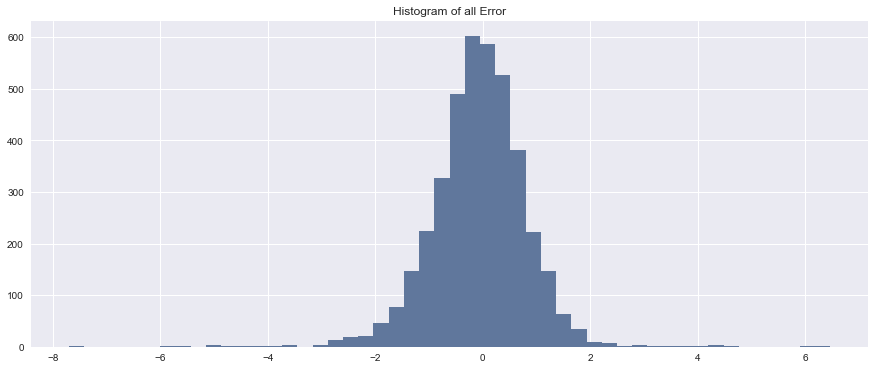

In [10]:
print('Error skew:',data.Error.skew())
plt.figure(figsize=(15,6))
plt.hist(data.Error.dropna(),bins=50)
plt.title('Histogram of all Error')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


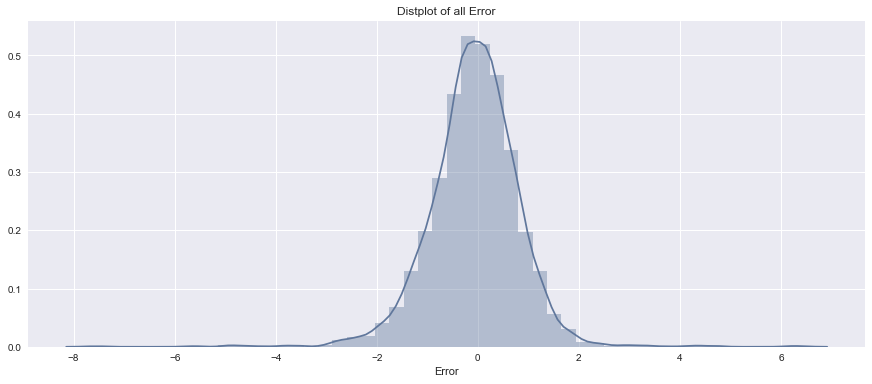

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(data.Error.dropna(), bins = 50)
plt.title('Distplot of all Error')

### Explore data sets by Entity.  Common in production environments to break out and explore data by tool or entity to see if they are performing similarly.

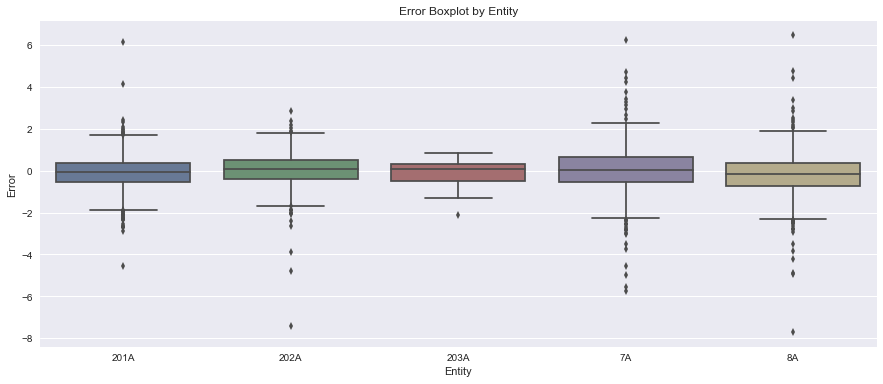

In [12]:
#boxplots by entity
datacompare = data.dropna()
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Error Boxplot by Entity')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


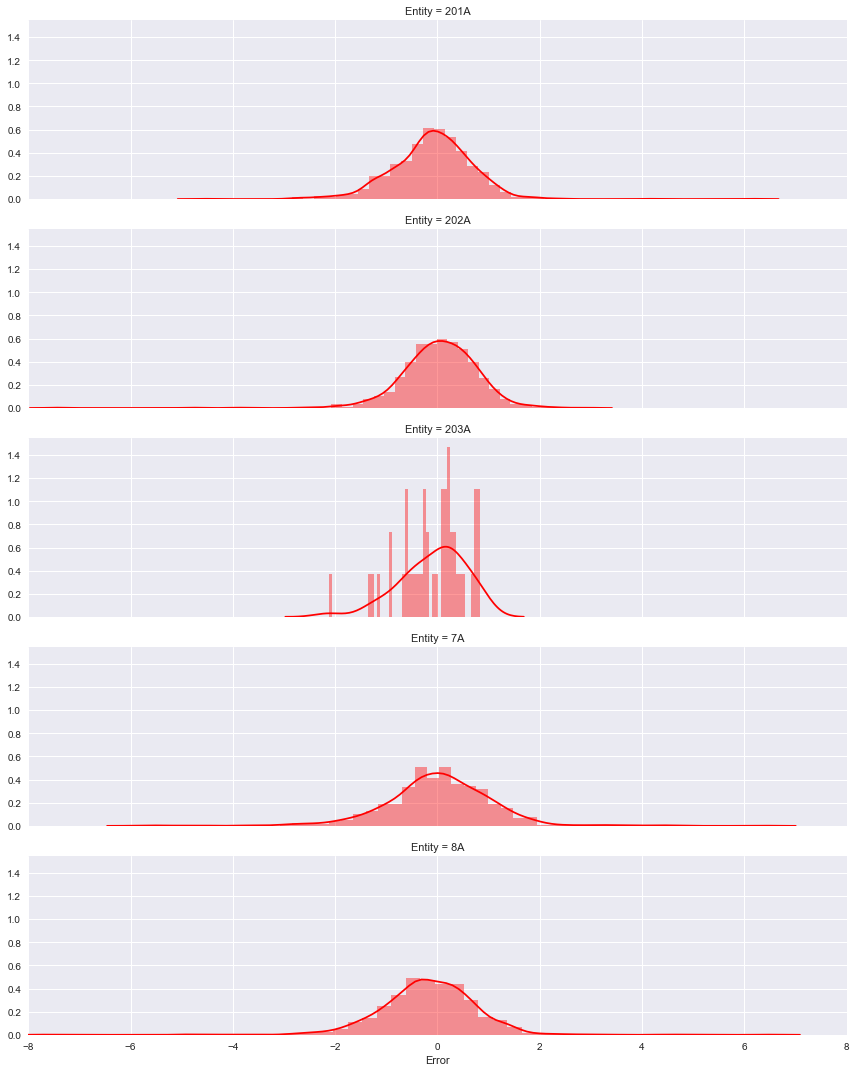

In [13]:
#very noteworthy that Entity = 203A does not have as uniform a dataset as the other entities.  possibly remove from later 
#models to explore impact.
g = sns.FacetGrid(datacompare, row = "Entity", aspect = 4, xlim = (-8,8))
g.map(sns.distplot, 'Error', bins = 50, color = 'r')

### Create time series of a single Entity run (where we see Run_On_Ent restart at 1).  This will be used as our toy dataset.  

In [14]:
#create toy data sets by entity, we will work w toy7 which has the most rows and a very normal distribution
toy7_df = data.loc[data['Entity'] == '7A']
toy8_df = data.loc[data['Entity'] == '8A']
toy201_df = data.loc[data['Entity'] == '201A']
toy202_df = data.loc[data['Entity'] == '202A']
toy203_df = data.loc[data['Entity'] == '203A']
toy7_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
27805,7A,1,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27806,7A,2,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
27807,7A,3,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27808,7A,4,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27809,7A,5,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN
27810,7A,6,245927,3504,NaN,800,20,1.5,5.0,1,1,0,1,0,NaN,NaN
27811,7A,7,7AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
27812,7A,8,7ACMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
27813,7A,9,246621,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27814,7A,10,246676,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN


### Focusing on Toy7 data set

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


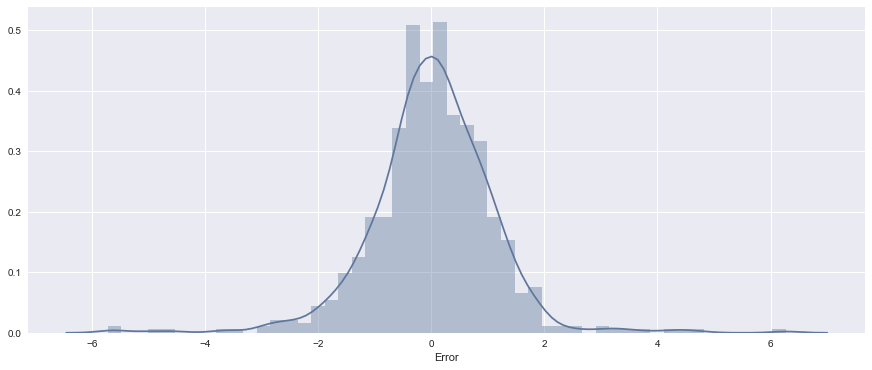

In [15]:
#we can see the toy dataset is also a well formed Gaussian centered about 0.
plt.figure(figsize=(15,6))
sns.distplot(toy7_df.Error.dropna(), bins = 50)

In [16]:
toy7_df.Error.describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64

### the time series scatter plot is significant in that it shows a couple of significant things.  we can see the mean and variability are roughly stable throughout the life of the dataset.  Variance is homoscedastic although it may tighten slightly in the dataset after 15k.  Also, the customer's critical data does not actually start until roughly 4k data pts.  

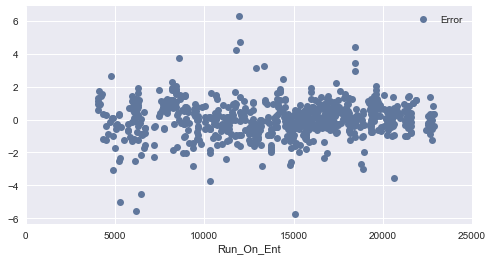

In [17]:
toy7_df.plot(x = 'Run_On_Ent', y = 'Error', xlim = [0, 25000], style = 'o')

### Begin data analysis by lagging all features and attributes from 1-20 lags and creating a new df from this combined with all the "Error" measurements in the toy7 dataset.  The lag was chosen with input from customer process data expert.  Experimental evidence points to lagging influence being confined to most preceding runs (possibly only several runs).  Therefore, we cap the lagging to 20 and increment by single runs.   Intitial analysis will be confined to exploring each attr/variable independantly, but later will expand to combinations.

In [18]:
#build a new dataframe that lags over each feature.  (default lag = 2 if none provided)
def FeatureLagging (datasystem, lag = 2, dropna = False):
    if type(datasystem) is pd.DataFrame:
        new_dict = {}
        for col_name in datasystem:
            if "Feature" in col_name or "Attribute" in col_name:
                new_dict[col_name] = datasystem[col_name]
                for xshift in range(1, lag + 1):
                    new_dict['%s_lag%d' % (col_name, xshift)] = datasystem[col_name].shift(xshift)
            else: 
                pass
            res = pd.DataFrame(new_dict, index = datasystem.index)
            
    else:
        print('error - must be 2D dataframe')
        return None

    if dropna == True:
        return res.dropna()
    else: return res


In [19]:
#use sequential run_on_ent as our row index
s = toy7_df.set_index('Run_On_Ent')
s.head()

,Entity,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
Run_On_Ent,,,,,,,,,,,,,,,
1,7A,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
2,7A,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
3,7A,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
4,7A,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
5,7A,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN


In [20]:
#Use feature lagging function to shift all attributes/features and align with Error into a new df
lag7_df = FeatureLagging(s,lag=20,dropna=False)
lag7_df.insert(0, 'Error', s.Error)
lag7_df#.Error.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN
6,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,0.0,5.0,NaN,NaN,NaN,NaN
7,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,0.0,5.0,NaN,NaN,NaN
8,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,5.0,0.0,5.0,NaN,NaN
9,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,5.0,5.0,5.0,5.0,0.0,5.0,NaN


In [21]:
#new ndarray where we only look at row with 'Error' available and the corresponding lagged attributes from out matrix
lag7data_df = lag7_df.dropna()
lag7data_df

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
4031,0.929,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,5.0,5.0,4.00,5.0,4.00,5.0,4.0,5.0,8.0
4057,1.101,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,5.0,4.0,5.00,4.0,5.00,5.0,4.0,5.0,5.0
4064,1.304,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,0.0,5.0,5.00,5.0,4.00,5.0,4.0,4.0,5.0
4066,0.599,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,4.0,4.0,4.00,0.0,5.00,5.0,4.0,5.0,4.0
4121,1.738,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,5.0,5.0,5.00,4.0,4.00,5.0,4.0,5.0,4.0
4132,0.878,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,4.0,4.00,5.0,4.00,4.0,5.0,5.0,2.0
4172,0.930,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,4.0,5.0,5.0,5.00,10.0,8.00,2.0,5.0,4.0,5.0
4204,1.408,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,10.0,5.00,2.0,10.00,0.0,5.0,5.0,4.0
4269,1.525,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,8.0,5.0,4.00,4.0,5.00,4.0,5.0,4.0,4.0


In [22]:
lag7data_df.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
count,764.000000,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.017473,0.0,0.066754,0.346859,0.373037,0.332461,0.352094,0.401832,0.357330,0.321990,...,4.673194,5.142644,4.686702,4.934542,4.616034,4.883482,4.920563,4.916230,4.897461,4.728168
std,1.086037,0.0,0.249759,0.476282,0.483929,0.471404,0.477936,0.490590,0.479527,0.467545,...,2.081132,2.223521,2.200762,2.246346,2.032633,2.178617,2.275242,2.158418,2.102419,2.137410
min,-5.725000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.524750,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,0.046500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,5.000000,4.000000,4.500000,4.000000,4.000000,4.500000,4.000000,5.000000,4.000000
75%,0.648000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.269000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [23]:
from scipy import signal

### Welch's Cross Power Spectral Density weighted Coherence

In [24]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(lag7data_df.Error, lag7data_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(lag7data_df.Error, lag7data_df[col], 1)


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


Weighted Coherence defined by weighting Cross Spectral Density Amplitude

In [25]:
for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 

In [26]:
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False)
w_Coh_df.to_frame()

,weighted_Coh
Attribute1_lag14,0.428801
Feature1_lag6,0.407905
Feature1_lag17,0.404339
Attribute5_lag2,0.393565
Feature2_lag19,0.393031
Attribute4_lag18,0.390530
Feature1_lag19,0.389658
Attribute5_lag18,0.387216
Attribute4_lag13,0.386490
Attribute3_lag13,0.386479


### The weighted coherence do not indicate a usable lag function when confined to toy7_df and a single attribute/feature.   This may be due to overlap of single attributes/features across multiple types of products running.  To explore further we will confirm the above results on the entire dataframe for all tools combined and then explore combinations of attributes/features together.

In [27]:
data.size

1145088

In [28]:
s = data
datalag_df = FeatureLagging(s,lag=20,dropna=False)
datalag_df.insert(0, 'Error', s.Error)
datalag_df = datalag_df.dropna()#.Error.describe()
datalag_df

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
344,-1.086,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.00,5.00,5.0,5.0,5.00,4.00,10.0,5.00,4.00,4.00
350,0.449,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5.00,5.00,2.0,10.0,2.00,4.00,4.0,2.00,5.00,5.00
364,0.471,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.00,4.00,4.0,8.0,5.00,5.00,5.0,5.00,2.00,2.00
366,0.540,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,10.00,4.00,2.0,4.0,4.00,8.00,5.0,5.00,5.00,5.00
410,-0.438,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,4.00,5.00,5.0,4.0,4.00,2.00,2.0,2.00,2.00,5.00
471,-0.241,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.00,5.00,5.0,5.0,2.00,2.00,5.0,5.00,4.00,2.00
479,-1.234,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.00,5.00,2.0,10.0,4.00,5.00,5.0,5.00,4.00,4.00
549,-0.926,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.00,5.00,4.0,2.0,2.00,4.00,5.0,2.00,4.00,5.00
567,0.249,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.00,5.00,5.0,5.0,5.00,4.00,2.0,2.00,5.00,10.00
677,1.640,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,8.00,4.00,4.0,5.0,5.00,5.00,4.0,4.00,5.00,2.00


Quick check on lagging the entire dataset yields 3985 rows, which matched the count of Error rows earlier in the analysis.

Now we will compute the CSD modulus and weighted coherence matrix like before.

In [29]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(datalag_df.Error, datalag_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(datalag_df.Error, datalag_df[col], 1)

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 
            
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False).to_frame()
w_Coh_df


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


,weighted_Coh
Feature1_lag17,0.064353
Attribute5_lag7,0.064136
Attribute3_lag13,0.063556
Attribute1_lag16,0.063269
Attribute2_lag3,0.062911
Feature3_lag14,0.062610
Feature2_lag12,0.062246
Attribute4_lag10,0.062193
Feature2_lag17,0.062048
Feature1_lag12,0.061284


### As expected, weighted coherence do not indicate a standout lag function when confined to a single attribute/feature.   

Need to investigate the following top 5 low lag:  metal, plasma density, resist, bias, glass

    Attribute2_lag3	    0.062911
    
    Feature1_lag3       0.059466
    
    Attribute1_lag1     0.059229
    
    Feature2_lag1       0.058596
    
    Attribute5_lag2     0.058442
    
    
    

### To explore further we will begin by treating the combination of all attributes and all features together as single feature/attribute.  This is expected to help with the data overlap when treating each one seperately.

In [30]:
c_df = data #new working dataframe
c_df.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


In [31]:
#need to handle the decimals contained in features prior to conversion and concatenation

c_df.loc[:,'Feature3'] *= 10 #coverts all to a whole number
c_df.loc[:,'Feature3'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.Feature3 = c_df.Feature3.astype(int) 
c_df.Feature4 = c_df.Feature4.astype(int) 

In [32]:
c_df.Feature3.head()

0    150
1    150
2    300
3    150
4    150
Name: Feature3, dtype: int32

In [33]:
c_df.Feature4.head()

0    400
1    400
2    800
3    400
4    400
Name: Feature4, dtype: int32

In [34]:
#concatenate all the attributes/features in the original data file as strings
# 9 is so we don't lose the leading 0 when coverting back to int later
c_df['combined_Attribute'] = '9' + c_df['Attribute1'].map(str) + c_df['Attribute2'].map(str) \
                                  + c_df['Attribute3'].map(str) + c_df['Attribute4'].map(str) \
                                  + c_df['Attribute5'].map(str)


        
c_df['combined_Feature'] = c_df['Feature1'].map(str) + c_df['Feature2'].map(str) \
                            + c_df['Feature3'].map(str) + c_df['Feature4'].map(str)

In [35]:
c_df['combined_Feature'].head()

0    25070150400
1    25070150400
2    60015300800
3    25070150400
4    25070150400
Name: combined_Feature, dtype: object

In [36]:
c_df['combined_Attribute'].head()

0    901001
1    901001
2    910000
3    901001
4    901001
Name: combined_Attribute, dtype: object

In [37]:
#16 unique combinations of features were created to use
c_df.combined_Feature.unique()

array(['25070150400', '60015300800', '25017600200', '80015600500',
       '80020150500', '80012150500', '800301501000', '25015150800',
       '60008000', '60020150500', '8001080033', '30015300600',
       '80030600500', '40017600200', '32550150400', '800151501000'], dtype=object)

In [38]:
#15 unique combinations of attributes were created to use
c_df.combined_Attribute.unique()

array(['901001', '910000', '911100', '911000', '911010', '901110',
       '901011', '910010', '901111', '900001', '911001', '910011',
       '911011', '901100', '901010'], dtype=object)

In [39]:
c_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design,combined_Attribute,combined_Feature
0,201A,1,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
1,201A,2,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
2,201A,3,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
3,201A,4,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
4,201A,5,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
5,201A,6,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
6,201A,7,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
7,201A,8,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
8,201A,9,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
9,201A,10,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400


In [90]:
#lag the new process descriptors as combined_Feature and combined_Attribute
#filter to a df looking only at low lag processes to start (lag = 1,2,3)
s = c_df
clag_df = FeatureLagging(s,lag=5,dropna=False)
clag_df.insert(0, 'Error', s.Error)
fclag_df = clag_df.dropna()#.Error.describe()
fclag_df = fclag_df.filter(items = ['Error', 'combined_Attribute_lag1','combined_Attribute_lag2','combined_Attribute_lag3' \
                    , 'combined_Attribute_lag4', 'combined_Attribute_lag5', 'combined_Feature_lag1', 'combined_Feature_lag2' \
                    ,'combined_Feature_lag3', 'combined_Feature_lag4', 'combined_Feature_lag5'])
fclag_df = fclag_df.reset_index(drop=True)
reg_original_df = fclag_df #copy this df for use later in regression, needs to be df w no combined lags sutiable for 1hot encode
fclag_df.head()

,Error,combined_Attribute_lag1,combined_Attribute_lag2,combined_Attribute_lag3,combined_Attribute_lag4,combined_Attribute_lag5,combined_Feature_lag1,combined_Feature_lag2,combined_Feature_lag3,combined_Feature_lag4,combined_Feature_lag5
0,-1.086,911100,911010,910010,901011,901110,25017600200,80012150500,80012150500,80012150500,25070150400
1,0.449,901001,901011,901111,911100,901110,25070150400,80012150500,800301501000,25017600200,25070150400
2,0.471,901001,901001,910000,910010,910010,25070150400,25070150400,60015300800,80012150500,80012150500
3,0.540,901001,901110,901001,901001,910000,25070150400,25070150400,25070150400,25070150400,60015300800
4,-0.438,901001,911010,901110,901001,911100,25070150400,80012150500,25070150400,25070150400,25017600200


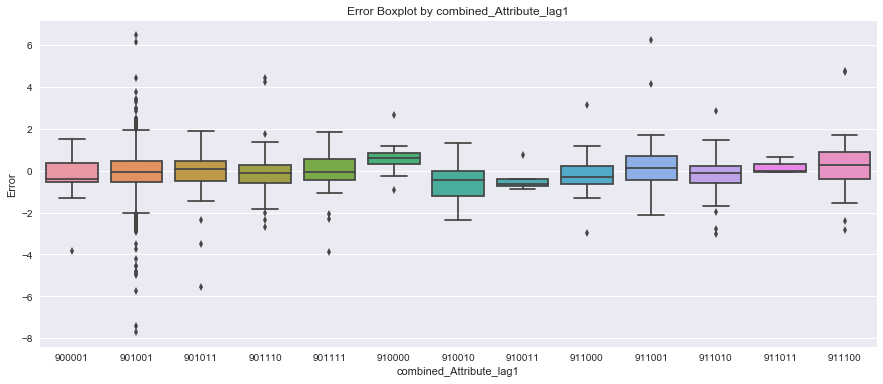

In [41]:
#explore boxplot of combined Attribute at lag1
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag1', y = 'Error', data = fclag_df)
plt.title('Error Boxplot by combined_Attribute_lag1')

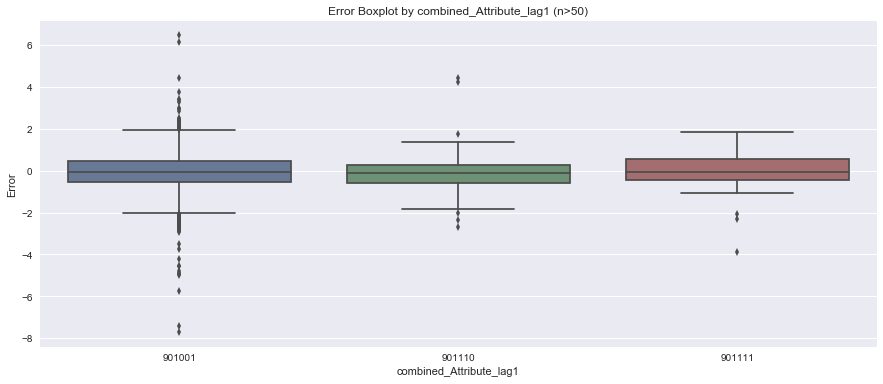

In [42]:
# filter the boxplot to show only groups w n>50
CAL1 = fclag_df.groupby('combined_Attribute_lag1').filter(lambda x: x['combined_Attribute_lag1'].count()>50)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag1', y = 'Error', data = CAL1)
plt.title('Error Boxplot by combined_Attribute_lag1 (n>50)')

In [43]:
pd.set_option('display.height', 100)
pd.set_option('display.max_rows', 100)
CAL1.groupby('combined_Attribute_lag1').describe()

height has been deprecated.



Error
combined_Attribute_lag1                   
901001                  count  3614.000000
                        mean     -0.079243
                        std       0.866734
                        min      -7.700000
                        25%      -0.544000
                        50%      -0.047000
                        75%       0.451000
                        max       6.467000
901110                  count    67.000000
                        mean     -0.051313
                        std       1.103658
                        min      -2.705000
                        25%      -0.602500
                        50%      -0.116000
                        75%       0.296500
                        max       4.415000
901111                  count    72.000000
                        mean     -0.028653
                        std       0.874536
                        min      -3.871000
                        25%      -0.452000
                        50%      -0.065000
                        75%       0.566000
                        max       1.874000

### We can see that for lag1 that 901001 dominates the data (n>3600).  This was expected by the data expert as there is already a setup run in place to try and control lag1 effects.  We will therefore focus on lag2 & lag3.

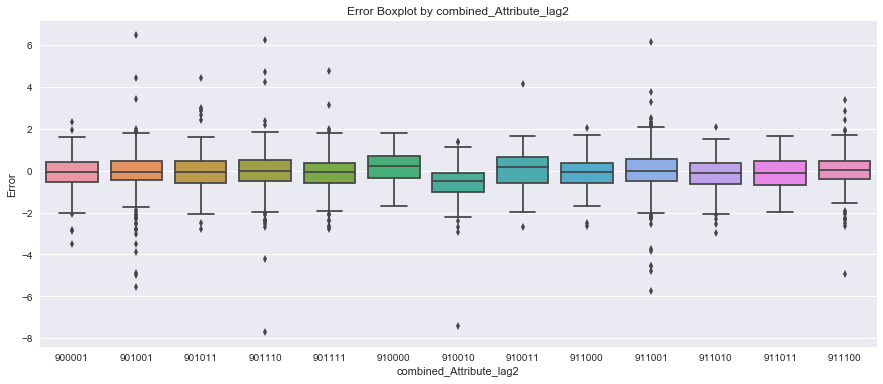

In [44]:
#explore boxplot of combined Attribute at lag2
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag2', y = 'Error', data = fclag_df)
plt.title('Error Boxplot by combined_Attribute_lag2')

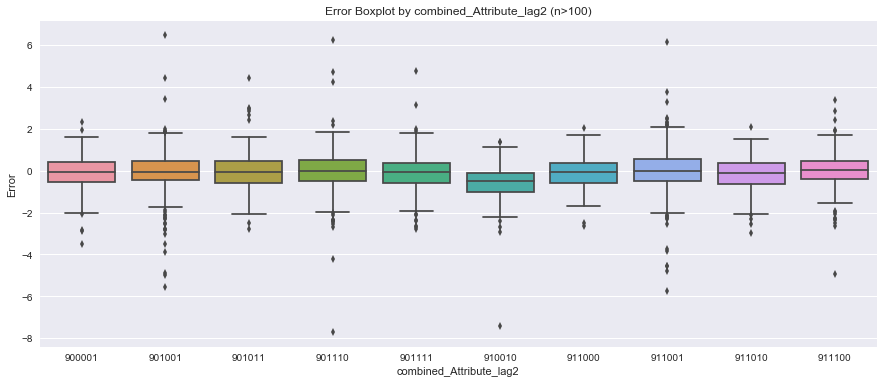

In [45]:
#filter boxplot for n>100 contributions 
CAL2 = fclag_df.groupby('combined_Attribute_lag2').filter(lambda x: x['combined_Attribute_lag2'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag2', y = 'Error', data = CAL2)
plt.title('Error Boxplot by combined_Attribute_lag2 (n>100)')

##### Box plots for lag2 indicate that 910010 may show some delta from the rest as their box plots are not uniformly centered about 0 

In [46]:
CAL2.groupby('combined_Attribute_lag2').describe()

Error
combined_Attribute_lag2                  
900001                  count  412.000000
                        mean    -0.074859
                        std      0.786959
                        min     -3.479000
                        25%     -0.559250
                        50%     -0.042500
                        75%      0.430750
                        max      2.329000
901001                  count  519.000000
                        mean    -0.062911
                        std      0.979774
                        min     -5.534000
                        25%     -0.462500
                        50%     -0.059000
                        75%      0.448000
                        max      6.467000
901011                  count  240.000000
                        mean    -0.033450
                        std      0.901817
                        min     -2.760000
                        25%     -0.572000
                        50%     -0.041500
                        75%      0.469000
                        max      4.409000
901110                  count  514.000000
                        mean    -0.027471
                        std      0.962538
                        min     -7.700000
                        25%     -0.485500
                        50%      0.012000
                        75%      0.507750
                        max      6.269000
901111                  count  567.000000
                        mean    -0.125287
                        std      0.792523
                        min     -2.766000
                        25%     -0.588500
                        50%     -0.077000
                        75%      0.370000
                        max      4.762000
910010                  count  130.000000
                        mean    -0.592815
                        std      1.002746
                        min     -7.424000
                        25%     -1.011250
                        50%     -0.490000
                        75%     -0.105000
                        max      1.388000
911000                  count  132.000000
                        mean    -0.130856
                        std      0.758087
                        min     -2.659000
                        25%     -0.606000
                        50%     -0.045500
                        75%      0.356750
                        max      2.032000
911001                  count  639.000000
                        mean    -0.004872
                        std      0.998927
                        min     -5.725000
                        25%     -0.495000
                        50%      0.010000
                        75%      0.556500
                        max      6.149000
911010                  count  308.000000
                        mean    -0.185607
                        std      0.791714
                        min     -2.988000
                        25%     -0.619250
                        50%     -0.121000
                        75%      0.353250
                        max      2.102000
911100                  count  404.000000
                        mean     0.027450
                        std      0.809606
                        min     -4.909000
                        25%     -0.397000
                        50%      0.051000
                        75%      0.490000
                        max      3.365000

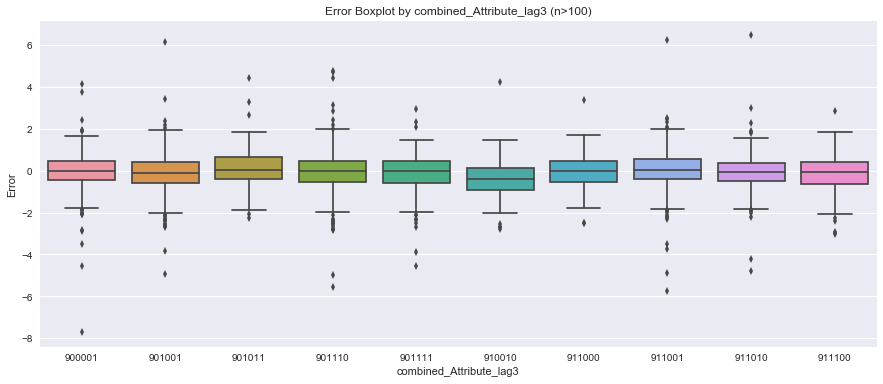

In [47]:
#filtered boxplot for n>100 contributions 
CAL3 = fclag_df.groupby('combined_Attribute_lag3').filter(lambda x: x['combined_Attribute_lag3'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag3', y = 'Error', data = CAL3)
plt.title('Error Boxplot by combined_Attribute_lag3 (n>100)')

In [48]:
CAL3.groupby('combined_Attribute_lag3').describe()

Error
combined_Attribute_lag3                  
900001                  count  414.000000
                        mean    -0.053925
                        std      0.934810
                        min     -7.700000
                        25%     -0.449500
                        50%     -0.019000
                        75%      0.444750
                        max      4.144000
901001                  count  813.000000
                        mean    -0.092365
                        std      0.852258
                        min     -4.909000
                        25%     -0.588000
                        50%     -0.087000
                        75%      0.427000
                        max      6.149000
901011                  count  179.000000
                        mean     0.097782
                        std      0.956605
                        min     -2.250000
                        25%     -0.407500
                        50%      0.019000
                        75%      0.640000
                        max      4.415000
901110                  count  708.000000
                        mean    -0.030161
                        std      0.934051
                        min     -5.534000
                        25%     -0.533000
                        50%     -0.021500
                        75%      0.471250
                        max      4.762000
901111                  count  431.000000
                        mean    -0.086459
                        std      0.818090
                        min     -4.560000
                        25%     -0.571000
                        50%     -0.017000
                        75%      0.451000
                        max      2.956000
910010                  count  155.000000
                        mean    -0.417323
                        std      0.887815
                        min     -2.793000
                        25%     -0.906000
                        50%     -0.386000
                        75%      0.150000
                        max      4.219000
911000                  count  134.000000
                        mean    -0.095157
                        std      0.822586
                        min     -2.519000
                        25%     -0.517250
                        50%     -0.022000
                        75%      0.466250
                        max      3.365000
911001                  count  407.000000
                        mean     0.025128
                        std      0.960620
                        min     -5.725000
                        25%     -0.408500
                        50%      0.027000
                        75%      0.562000
                        max      6.269000
911010                  count  275.000000
                        mean    -0.081324
                        std      0.935817
                        min     -4.787000
                        25%     -0.505500
                        50%     -0.054000
                        75%      0.393000
                        max      6.467000
911100                  count  384.000000
                        mean    -0.135055
                        std      0.801914
                        min     -3.042000
                        25%     -0.615750
                        50%     -0.076000
                        75%      0.407500
                        max      2.867000

<function matplotlib.pyplot.show>

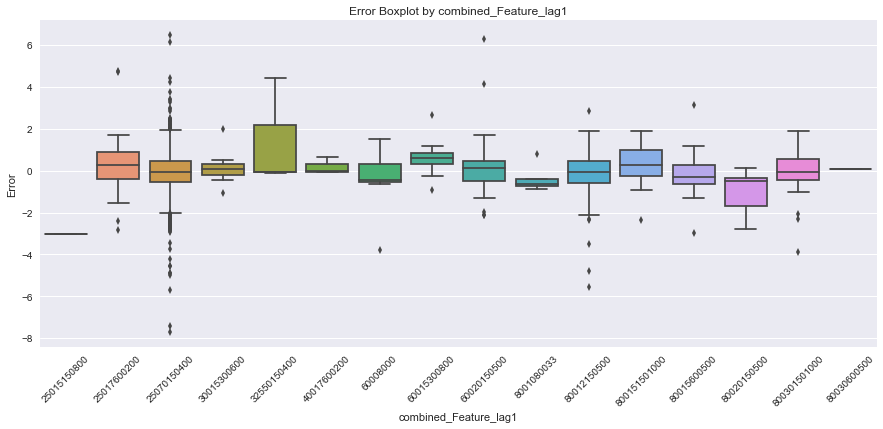

In [49]:
#repeating the same procedure to explore the boxplot and filtered boxplot for each combined Features lag1,2,3

plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag1', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag1')
plt.show

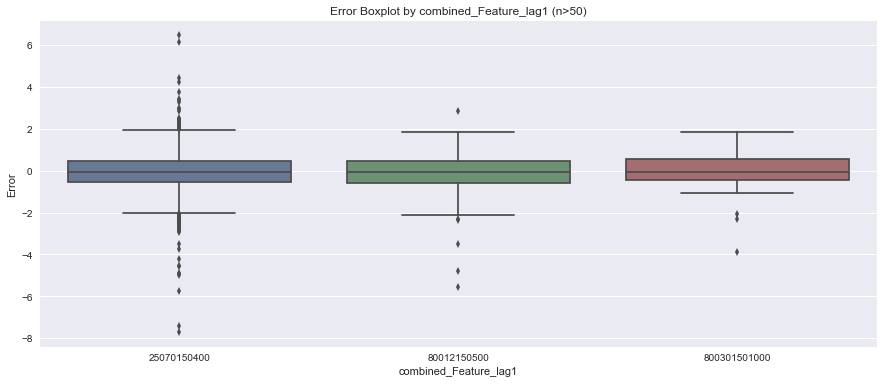

In [50]:
CFL1 = fclag_df.groupby('combined_Feature_lag1').filter(lambda x: x['combined_Feature_lag1'].count()>50)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag1', y = 'Error', data = CFL1)
plt.title('Error Boxplot by combined_Feature_lag1 (n>50)')

In [51]:
CFL1.groupby('combined_Feature_lag1').describe()

Error
combined_Feature_lag1                   
25070150400           count  3645.000000
                      mean     -0.079833
                      std       0.865874
                      min      -7.700000
                      25%      -0.545000
                      50%      -0.049000
                      75%       0.449000
                      max       6.467000
80012150500           count   113.000000
                      mean     -0.176531
                      std       1.160396
                      min      -5.534000
                      25%      -0.603000
                      50%      -0.079000
                      75%       0.444000
                      max       2.838000
800301501000          count    72.000000
                      mean     -0.028653
                      std       0.874536
                      min      -3.871000
                      25%      -0.452000
                      50%      -0.065000
                      75%       0.566000
                      max       1.874000

### We can see that for lag1 that 25070150400 dominates the data (n>3600).  This was expected by the data expert as there is already a setup run in place to try and control lag1 effects.  We will therefore focus on lag2 & lag3.

<function matplotlib.pyplot.show>

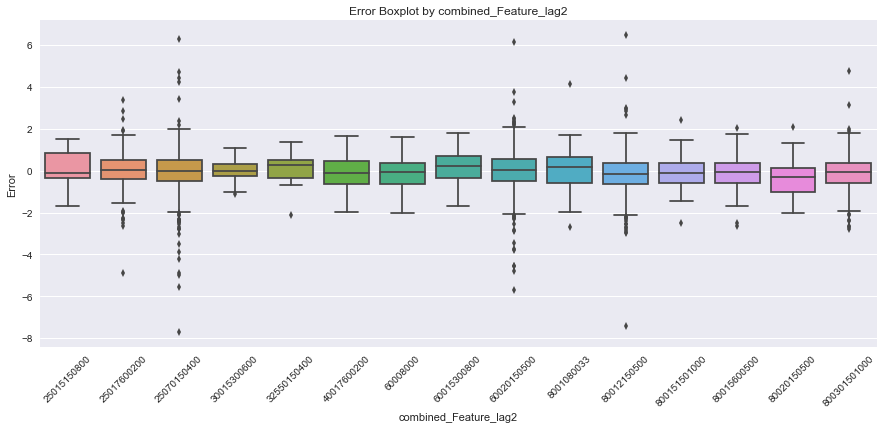

In [52]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag2', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag2')
plt.show

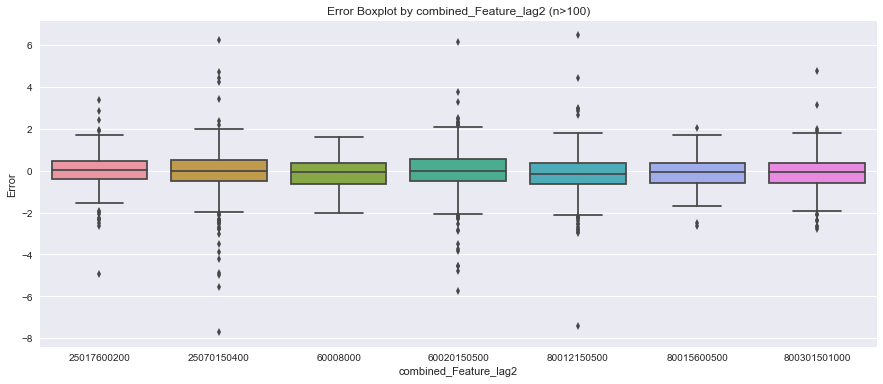

In [53]:
CFL2 = fclag_df.groupby('combined_Feature_lag2').filter(lambda x: x['combined_Feature_lag2'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag2', y = 'Error', data = CFL2)
plt.title('Error Boxplot by combined_Feature_lag2 (n>100)')

<function matplotlib.pyplot.show>

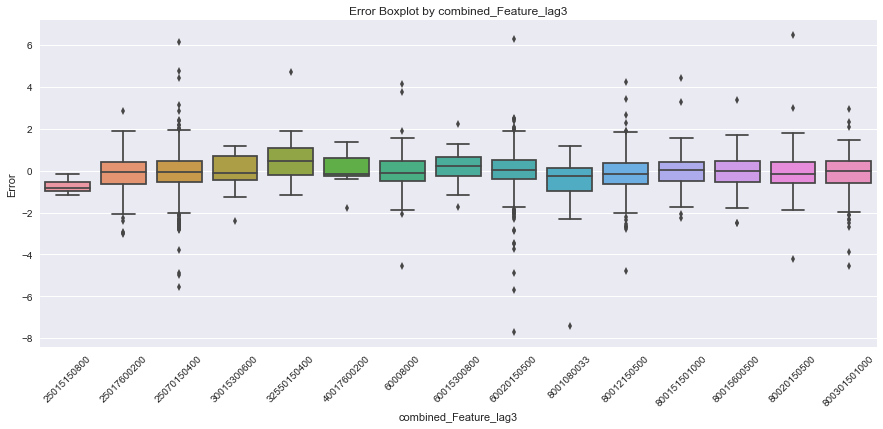

In [54]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag3', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag3')
plt.show

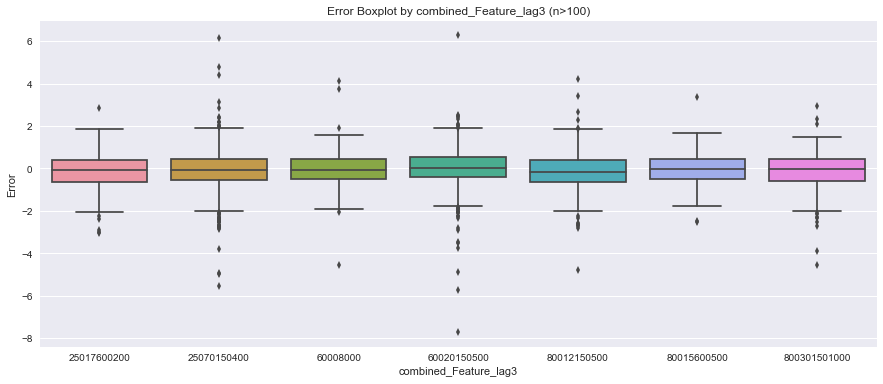

In [55]:
CFL3 = fclag_df.groupby('combined_Feature_lag3').filter(lambda x: x['combined_Feature_lag3'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag3', y = 'Error', data = CFL3)
plt.title('Error Boxplot by combined_Feature_lag3 (n>100)')

##### when filtered for n>100, the box plots seem to indicate all lag2 & lag3 may be fairly matched but will be checked in ANOVA and Tukey's 

### Peform ANOVA across all combined Attributes and Features at lag = 1,2,3 

In [56]:
import scipy.stats as stats

#ANOVA over 13 combined attribute combinations for lag 1,2,3
for col in fclag_df:
        string = ''
        if (col != 'Error') & ('Attribute' in col):
            grps = fclag_df[col].unique()
            g_c_df = {grp:fclag_df['Error'][fclag_df[col] == grp] for grp in grps}

            F, p = stats.f_oneway(g_c_df[grps[0]], g_c_df[grps[1]], g_c_df[grps[2]], g_c_df[grps[3]],g_c_df[grps[4]] \
                                 ,g_c_df[grps[5]], g_c_df[grps[6]], g_c_df[grps[7]], g_c_df[grps[8]],g_c_df[grps[9]] \
                                 ,g_c_df[grps[10]], g_c_df[grps[11]], g_c_df[grps[12]])
            print (col, 'F =', F, 'p =', p)


combined_Attribute_lag1 F = 2.40038669078 p = 0.0043102279205
combined_Attribute_lag2 F = 5.36740225337 p = 4.21953173956e-09
combined_Attribute_lag3 F = 4.50715328752 p = 2.98093497024e-07
combined_Attribute_lag4 F = 3.16057255543 p = 0.000165906292156
combined_Attribute_lag5 F = 2.47074853273 p = 0.00323313138712


In [57]:
#repeat same ANOVA over 15 features lag 1,2,3
for col in fclag_df:
        string = ''
        if (col != 'Error') & ('Feature' in col):
            grps = fclag_df[col].unique()
            g_c_df = {grp:fclag_df['Error'][fclag_df[col] == grp] for grp in grps}

            F, p = stats.f_oneway(g_c_df[grps[0]], g_c_df[grps[1]], g_c_df[grps[2]], g_c_df[grps[3]],g_c_df[grps[4]] \
                                 ,g_c_df[grps[5]], g_c_df[grps[6]], g_c_df[grps[7]], g_c_df[grps[8]],g_c_df[grps[9]] \
                                 ,g_c_df[grps[10]], g_c_df[grps[11]], g_c_df[grps[12]],g_c_df[grps[13]], g_c_df[grps[14]])
            print (col, 'F =', F, 'p =', p)

combined_Feature_lag1 F = 3.42101451436 p = 1.48528855796e-05
combined_Feature_lag2 F = 2.43766643711 p = 0.00203980043856
combined_Feature_lag3 F = 2.93961682199 p = 0.000177577464664
combined_Feature_lag4 F = 1.02128071207 p = 0.42805992832
combined_Feature_lag5 F = 0.940409441529 p = 0.513668157849


### We can see that p <=  0.05 for all 3 lags both features and attributes so we reject the null hypothesis under each lag and conclude that at least one of the means is differenent at each lag.  We will explore the differences further in Tukey's range test.

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

### Perform TukeyHSD  on the combined Attributes and Features (filtered for groups with n>100) across each lag = 1,2,3

In [59]:
mc = MultiComparison(CAL1['Error'], CAL1['combined_Attribute_lag1'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
901001 901110  0.0279   -0.224 0.2799 False 
901001 901111  0.0506  -0.1926 0.2938 False 
901110 901111  0.0227  -0.3242 0.3696 False 
--------------------------------------------
['901001' '901110' '901111']


### Data indicates all groups are matched at lag1 (*when filtered for n>50)

In [60]:
mc = MultiComparison(CAL2['Error'], CAL2['combined_Attribute_lag2'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001  0.0119  -0.1746  0.1985 False 
900001 901011  0.0414  -0.1882  0.271  False 
900001 901110  0.0474  -0.1396  0.2343 False 
900001 901111 -0.0504  -0.2335  0.1326 False 
900001 910010  -0.518  -0.8024 -0.2335  True 
900001 911000  -0.056  -0.3388  0.2268 False 
900001 911001   0.07   -0.1087  0.2486 False 
900001 911010 -0.1107  -0.3237  0.1022 False 
900001 911100  0.1023  -0.0957  0.3003 False 
901001 901011  0.0295  -0.1912  0.2502 False 
901001 901110  0.0354  -0.1405  0.2114 False 
901001 901111 -0.0624  -0.2341  0.1094 False 
901001 910010 -0.5299  -0.8072 -0.2526  True 
901001 911000 -0.0679  -0.3436  0.2077 False 
901001 911001  0.058    -0.109  0.2251 False 
901001 911010 -0.1227  -0.3261  0.0807 False 
901001 911100  0.0904  -0.0972  0.2779 False 
901011 901110  0.006   -0.2151  0.227  False 
901011 901111 -0.0918  -0.309

### (*when comparing only n>100 groups) Data indicates 910010  is not matched to other processes when lag2.  Recommendation to explore rules to prevent this occurrence.  (n=130) and mean difference of  ~0.5 from the rest of the groups is likely meaningful. 
CMPS at lag2

In [61]:
mc = MultiComparison(CAL3['Error'], CAL3['combined_Attribute_lag3'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001 -0.0384  -0.2088  0.1319 False 
900001 901011  0.1517  -0.1007  0.4041 False 
900001 901110  0.0238  -0.1508  0.1983 False 
900001 901111 -0.0325  -0.2267  0.1616 False 
900001 910010 -0.3634  -0.6291 -0.0977  True 
900001 911000 -0.0412  -0.3217  0.2392 False 
900001 911001  0.0791  -0.1179  0.276  False 
900001 911010 -0.0274  -0.2469  0.1921 False 
900001 911100 -0.0811   -0.281  0.1188 False 
901001 901011  0.1901  -0.0428  0.4231 False 
901001 901110  0.0622  -0.0828  0.2072 False 
901001 901111  0.0059  -0.1622  0.174  False 
901001 910010  -0.325  -0.5723 -0.0777  True 
901001 911000 -0.0028  -0.2659  0.2603 False 
901001 911001  0.1175  -0.0538  0.2888 False 
901001 911010  0.011   -0.1858  0.2079 False 
901001 911100 -0.0427  -0.2174  0.132  False 
901011 901110 -0.1279   -0.364  0.1081 False 
901011 901111 -0.1842  -0.435

### Data indicates 910010  is not matched to other processes when lag3.  Recommendation to explore rules to prevent this occurrence.  (n~150) and mean difference of  ~0.3-0.4 from the rest of the groups is likely meaningful. 
3544 CMPS at lag2 and lag3

##### Because the 910010 lag effect is seen at lag2 & lag3, we will quickly check lag4 to see how many lags are required for the effect to die.  This would be of particular import to the customer when creating rules.  It may help determine if run rules or strict segregation are required for this particular material combination.

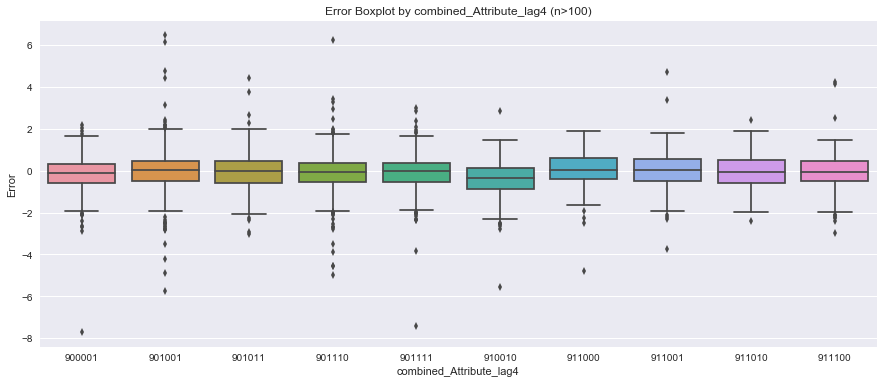

In [62]:
#filtered boxplot for n>100 contributions 
CAL4 = fclag_df.groupby('combined_Attribute_lag4').filter(lambda x: x['combined_Attribute_lag4'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag4', y = 'Error', data = CAL4)
plt.title('Error Boxplot by combined_Attribute_lag4 (n>100)')

In [63]:
CAL4.groupby('combined_Attribute_lag4').describe()

Error
combined_Attribute_lag4                   
900001                  count   434.000000
                        mean     -0.172776
                        std       0.843418
                        min      -7.700000
                        25%      -0.581000
                        50%      -0.127000
                        75%       0.345750
                        max       2.189000
901001                  count  1060.000000
                        mean     -0.027141
                        std       0.903398
                        min      -5.725000
                        25%      -0.500250
                        50%       0.015500
                        75%       0.490000
                        max       6.467000
901011                  count   194.000000
                        mean     -0.035902
                        std       0.975341
                        min      -3.042000
                        25%      -0.600000
                        50%      -0.023000
                        75%       0.490500
                        max       4.415000
901110                  count   667.000000
                        mean     -0.093483
                        std       0.917610
                        min      -4.980000
                        25%      -0.551000
                        50%      -0.077000
                        75%       0.380500
                        max       6.269000
901111                  count   376.000000
                        mean     -0.092559
                        std       0.915697
                        min      -7.424000
                        25%      -0.544250
                        50%      -0.025000
                        75%       0.378250
                        max       2.998000
910010                  count   138.000000
                        mean     -0.434254
                        std       1.006200
                        min      -5.534000
                        25%      -0.892250
                        50%      -0.348000
                        75%       0.155250
                        max       2.838000
911000                  count   123.000000
                        mean      0.008504
                        std       0.924364
                        min      -4.787000
                        25%      -0.393500
                        50%       0.022000
                        75%       0.596500
                        max       1.907000
911001                  count   227.000000
                        mean      0.037643
                        std       0.898255
                        min      -3.725000
                        25%      -0.466500
                        50%       0.027000
                        75%       0.541000
                        max       4.711000
911010                  count   282.000000
                        mean     -0.051766
                        std       0.783165
                        min      -2.402000
                        25%      -0.570750
                        50%      -0.054500
                        75%       0.503000
                        max       2.447000
911100                  count   374.000000
                        mean     -0.042342
                        std       0.848373
                        min      -2.988000
                        25%      -0.501750
                        50%      -0.049500
                        75%       0.488500
                        max       4.219000

In [64]:
mc = MultiComparison(CAL4['Error'], CAL4['combined_Attribute_lag4'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001  0.1456  -0.0159  0.3071 False 
900001 901011  0.1369  -0.1079  0.3816 False 
900001 901110  0.0793  -0.0955  0.2541 False 
900001 901111  0.0802  -0.1194  0.2799 False 
900001 910010 -0.2615  -0.5384  0.0155 False 
900001 911000  0.1813  -0.1082  0.4707 False 
900001 911001  0.2104  -0.0217  0.4425 False 
900001 911010  0.121   -0.0957  0.3378 False 
900001 911100  0.1304  -0.0695  0.3304 False 
901001 901011 -0.0088  -0.2301  0.2125 False 
901001 901110 -0.0663  -0.2064  0.0737 False 
901001 901111 -0.0654  -0.2355  0.1047 False 
901001 910010 -0.4071  -0.6636 -0.1507  True 
901001 911000  0.0356  -0.2343  0.3056 False 
901001 911001  0.0648  -0.1425  0.272  False 
901001 911010 -0.0246  -0.2145  0.1652 False 
901001 911100 -0.0152  -0.1856  0.1552 False 
901011 901110 -0.0576  -0.2887  0.1736 False 
901011 901111 -0.0567  -0.307

##### The data indicates that even at lag4, 910010 has a strong difference from the rest of the groups by ~0.3-0.4.  Therefore, Lag effect is strong at lag2,3,4 and customer may investigate more aggressive modes of containment such as pure segregation of this material combination.

##### Continue analysis by performing the same Tukey analysis on combined Features at lag 1,2,3 

In [65]:
mc = MultiComparison(CFL1['Error'], CFL1['combined_Feature_lag1'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2    meandiff  lower  upper  reject
-------------------------------------------------------
25070150400 80012150500  -0.0967  -0.2929 0.0995 False 
25070150400 800301501000  0.0512  -0.1933 0.2956 False 
80012150500 800301501000  0.1479  -0.1619 0.4576 False 
-------------------------------------------------------
['25070150400' '80012150500' '800301501000']


### Data indicates all groups are matched at lag1 (*when filtered for n>50)

In [66]:
mc = MultiComparison(CFL2['Error'], CFL2['combined_Feature_lag2'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1      group2    meandiff  lower   upper  reject
--------------------------------------------------------
25017600200 25070150400  -0.0663  -0.2289  0.0962 False 
25017600200   60008000   -0.1402  -0.3766  0.0963 False 
25017600200 60020150500  -0.0426  -0.2031  0.1179 False 
25017600200 80012150500  -0.2091  -0.3745 -0.0437  True 
25017600200 80015600500  -0.1583  -0.4254  0.1087 False 
25017600200 800301501000 -0.1527  -0.3262  0.0207 False 
25070150400   60008000   -0.0738  -0.2911  0.1435 False 
25070150400 60020150500   0.0238  -0.1068  0.1544 False 
25070150400 80012150500  -0.1427  -0.2793 -0.0062  True 
25070150400 80015600500   -0.092  -0.3422  0.1583 False 
25070150400 800301501000 -0.0864  -0.2326  0.0598 False 
  60008000  60020150500   0.0976  -0.1182  0.3133 False 
  60008000  80012150500  -0.0689  -0.2883  0.1505 False 
  60008000  80015600500  -0.0181  -0.3216  0.2854 False 
  60008000  800301501000 -0.012

### Data indicates 80012150500  is not matched to other processes when lag2.  Recommendation to explore rules to prevent this occurrence.  This feature combination also runs with the material combination 910010.  I believe this further bolsters the confidence that the effect may be real.  The material combination may be the stronger factor when looking at meandiff between the groups.

In [67]:
mc = MultiComparison(CFL3['Error'], CFL3['combined_Feature_lag3'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2    meandiff  lower  upper  reject
-------------------------------------------------------
25017600200 25070150400   0.0651  -0.0856 0.2158 False 
25017600200   60008000    0.0758  -0.1826 0.3341 False 
25017600200 60020150500   0.1292  -0.0363 0.2948 False 
25017600200 80012150500   0.0016  -0.1657 0.1689 False 
25017600200 80015600500   0.0399  -0.2206 0.3004 False 
25017600200 800301501000  0.0486  -0.1336 0.2308 False 
25070150400   60008000    0.0107  -0.2224 0.2438 False 
25070150400 60020150500   0.0642  -0.0583 0.1867 False 
25070150400 80012150500  -0.0635  -0.1884 0.0615 False 
25070150400 80015600500  -0.0252  -0.2606 0.2103 False 
25070150400 800301501000 -0.0165  -0.1607 0.1277 False 
  60008000  60020150500   0.0535  -0.1895 0.2964 False 
  60008000  80012150500  -0.0742  -0.3184  0.17  False 
  60008000  80015600500  -0.0359  -0.3513 0.2795 False 
  60008000  800301501000 -0.0272  -0.2818 0.2274

### Data indicates all groups are matched at lag3 (*when filtered for n>100).  Noting that 80012150500 is not present is further evidence that material combination 910010 is the strongest factor.  910010 is unique but feature combination 80012150500 is shared across several material combinations.
CMPS recipe used at 3504, 3524, and 3544 but only the material combination at 3544 adversely affects Error

### At this point we have found a fairly strong indicator for increased absolute Error (Namely 910010 material attribute combination at either a lag2, lag3, or lag4!).  

### Can the combined attribute analysis also be confirmed using the Welch's Cross Power Spectral Density weighted Coherence with single factors that was attempted earlier? 

### Can we check across lag combinations and perform analysis (lag2+3, lag3+4, lag2+3+4, etc)

In [68]:
#create new combo columns that are back to back combinations of lags
combo_df = fclag_df
combo_df['cAttr_L12'] = combo_df['combined_Attribute_lag1'].map(str) + combo_df['combined_Attribute_lag2'].map(str) 
combo_df['cAttr_L23'] = combo_df['combined_Attribute_lag2'].map(str) + combo_df['combined_Attribute_lag3'].map(str) 
combo_df['cAttr_L34'] = combo_df['combined_Attribute_lag3'].map(str) + combo_df['combined_Attribute_lag4'].map(str) 
combo_df['cAttr_L45'] = combo_df['combined_Attribute_lag4'].map(str) + combo_df['combined_Attribute_lag5'].map(str) 

combo_df['cFeat_L12'] = combo_df['combined_Feature_lag1'].map(str) + combo_df['combined_Feature_lag2'].map(str) 
combo_df['cFeat_L23'] = combo_df['combined_Feature_lag2'].map(str) + combo_df['combined_Feature_lag3'].map(str) 
combo_df['cFeat_L34'] = combo_df['combined_Feature_lag3'].map(str) + combo_df['combined_Feature_lag4'].map(str) 
combo_df['cFeat_L45'] = combo_df['combined_Feature_lag4'].map(str) + combo_df['combined_Feature_lag5'].map(str) 

#filter the df down to 2 combo columns 
filtcombo_df = combo_df.filter(regex = 'Error|cAttr|cFeat')
filtcombo_df

,Error,cAttr_L12,cAttr_L23,cAttr_L34,cAttr_L45,cFeat_L12,cFeat_L23,cFeat_L34,cFeat_L45
0,-1.086,911100911010,911010910010,910010901011,901011901110,2501760020080012150500,8001215050080012150500,8001215050080012150500,8001215050025070150400
1,0.449,901001901011,901011901111,901111911100,911100901110,2507015040080012150500,80012150500800301501000,80030150100025017600200,2501760020025070150400
2,0.471,901001901001,901001910000,910000910010,910010910010,2507015040025070150400,2507015040060015300800,6001530080080012150500,8001215050080012150500
3,0.540,901001901110,901110901001,901001901001,901001910000,2507015040025070150400,2507015040025070150400,2507015040025070150400,2507015040060015300800
4,-0.438,901001911010,911010901110,901110901001,901001911100,2507015040080012150500,8001215050025070150400,2507015040025070150400,2507015040025017600200
5,-0.241,901001910010,910010901001,901001911100,911100911100,2507015040080012150500,8001215050080012150500,8001215050025017600200,2501760020025017600200
6,-1.234,901001901011,901011901111,901111901110,901110910010,2507015040080012150500,80012150500800301501000,80030150100025070150400,2507015040080012150500
7,-0.926,901001911001,911001911100,911100911100,911100901001,2507015040060020150500,6002015050025017600200,2501760020025017600200,2501760020025070150400
8,0.249,901001911001,911001901001,901001901011,901011901110,2507015040060020150500,6002015050080012150500,8001215050080012150500,8001215050025070150400
9,1.640,901111901001,901001911001,911001901001,901001901001,80030150100025070150400,2507015040060020150500,6002015050080012150500,8001215050080012150500


<function matplotlib.pyplot.show>

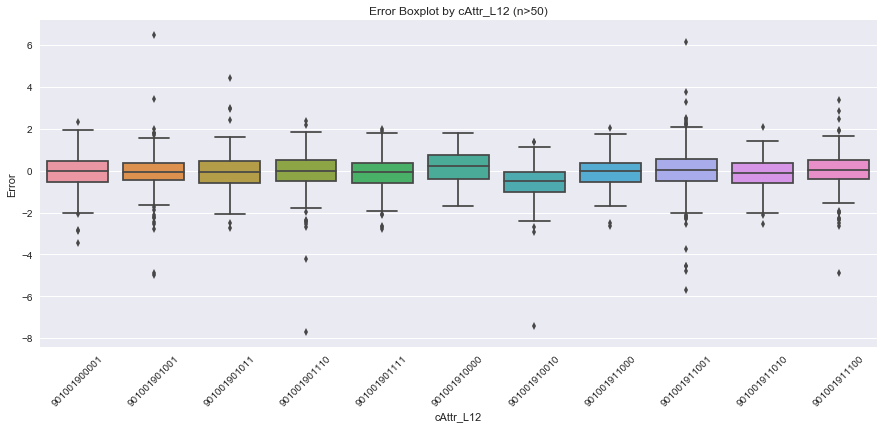

In [69]:
#filtered boxplot for n>100 contributions 
CAL12 = filtcombo_df.groupby('cAttr_L12').filter(lambda x: x['cAttr_L12'].count()>50)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L12', y = 'Error', data = CAL12)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L12 (n>50)')
plt.show

901001910000 - reject false but positive error, KMON + ERAT

901001910010 - reject true, KMON + 3544

In [70]:
mc = MultiComparison(CAL12['Error'], CAL12['cAttr_L12'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
901001900001 901001901001 -0.0229  -0.2283  0.1824 False 
901001900001 901001901011 -0.0018   -0.234  0.2304 False 
901001900001 901001901110  0.0179  -0.1727  0.2084 False 
901001900001 901001901111 -0.0732  -0.2565   0.11  False 
901001900001 901001910000  0.147   -0.2654  0.5595 False 
901001900001 901001910010 -0.5263  -0.8123 -0.2403  True 
901001900001 901001911000 -0.0624  -0.3467  0.2219 False 
901001900001 901001911001  0.0631  -0.1141  0.2404 False 
901001900001 901001911010  -0.097  -0.3117  0.1176 False 
901001900001 901001911100  0.0819  -0.1164  0.2801 False 
901001901001 901001901011  0.0211  -0.2187  0.261  False 
901001901001 901001901110  0.0408   -0.159  0.2405 False 
901001901001 901001901111 -0.0503  -0.2431  0.1426 False 
901001901001 901001910000   0.17   -0.2468  0.5867 False 
901001901001 9

<function matplotlib.pyplot.show>

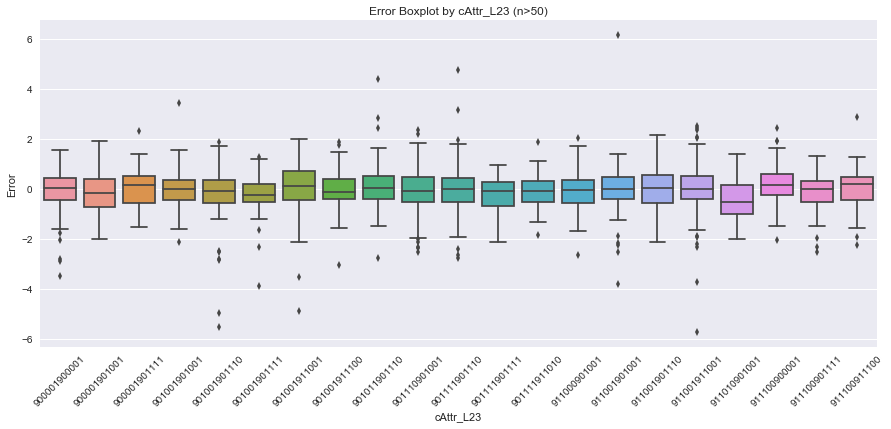

In [71]:
#filtered boxplot for n>50 contributions 
CAL23 = filtcombo_df.groupby('cAttr_L23').filter(lambda x: x['cAttr_L23'].count()>50)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L23', y = 'Error', data = CAL23)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L23 (n>50)')
plt.show

901011901110 911010901001 -0.5226  -1.0215 -0.0237  True 

911010901001 911100900001  0.5691   0.0568  1.0815  True

3504 CMPS / (3514 KMON or 3524 C2CLR) = slightly negative combination L23 respectively



In [72]:
mc = MultiComparison(CAL23['Error'], CAL23['cAttr_L23'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
900001900001 900001901001 -0.0629  -0.5453  0.4195 False 
900001900001 900001901111  0.1278  -0.3512  0.6068 False 
900001900001 901001901001  0.0341  -0.4266  0.4948 False 
900001900001 901001901110 -0.1846  -0.5911  0.2219 False 
900001900001 901001901111 -0.1973  -0.6667  0.2722 False 
900001900001 901001911001  0.0493  -0.4265  0.525  False 
900001900001 901001911100 -0.0228  -0.4484  0.4028 False 
900001900001 901011901110  0.1401  -0.2509  0.5312 False 
900001900001 901110901001 -0.0236  -0.3148  0.2675 False 
900001900001 901111901110 -0.0093  -0.3122  0.2936 False 
900001900001 901111901111 -0.1391  -0.6215  0.3433 False 
900001900001 901111911010 -0.0489  -0.5279  0.4301 False 
900001900001 911000901001 -0.0638  -0.4536  0.326  False 
900001900001 911001901001  0.0374  -0.3549  0.4298 False 
900001900001 9

<function matplotlib.pyplot.show>

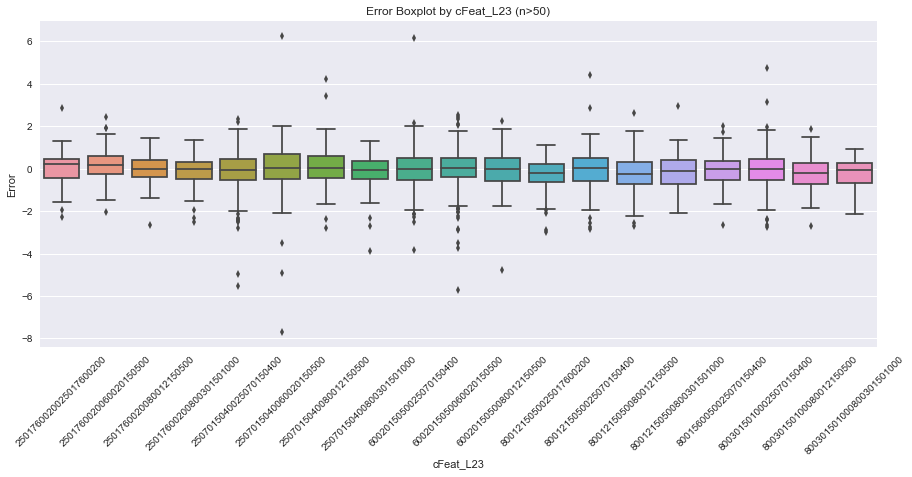

In [73]:
#filtered boxplot for n>50 contributions 
CFL23 = filtcombo_df.groupby('cFeat_L23').filter(lambda x: x['cFeat_L23'].count()>50)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cFeat_L23', y = 'Error', data = CFL23)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cFeat_L23 (n>50)')
plt.show

In [74]:
mc = MultiComparison(CFL23['Error'], CFL23['cFeat_L23'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

               Multiple Comparison of Means - Tukey HSD,FWER=0.05               
         group1                  group2          meandiff  lower   upper  reject
--------------------------------------------------------------------------------
 2501760020025017600200  2501760020060020150500   0.1166  -0.3991  0.6323 False 
 2501760020025017600200  2501760020080012150500  -0.0928  -0.6628  0.4773 False 
 2501760020025017600200 25017600200800301501000  -0.1174  -0.6579  0.4231 False 
 2501760020025017600200  2507015040025070150400  -0.1278  -0.5691  0.3135 False 
 2501760020025017600200  2507015040060020150500   -0.064  -0.6186  0.4906 False 
 2501760020025017600200  2507015040080012150500   0.0221  -0.4869  0.531  False 
 2501760020025017600200 25070150400800301501000  -0.1669  -0.7198  0.386  False 
 2501760020025017600200  6002015050025070150400  -0.0248  -0.4997  0.4501 False 
 2501760020025017600200  6002015050060020150500  -0.0559  -0.4937  0.382  False 
 2501760020025017600200  600

In [75]:
#create new combo columns that are 2,3,4 combos
combo3_df = fclag_df
combo3_df['cAttr_L123'] = combo3_df['combined_Attribute_lag1'].map(str) + combo3_df['combined_Attribute_lag2'].map(str) \
                       + combo3_df['combined_Attribute_lag3'].map(str) 

combo3_df['cAttr_L234'] = combo3_df['combined_Attribute_lag2'].map(str) + combo3_df['combined_Attribute_lag3'].map(str) \
                       + combo3_df['combined_Attribute_lag4'].map(str) 


#combo_df['cFeat_L12'] = combo_df['combined_Feature_lag1'].map(str) + combo_df['combined_Feature_lag2'].map(str) 
#combo_df['cFeat_L23'] = combo_df['combined_Feature_lag2'].map(str) + combo_df['combined_Feature_lag3'].map(str) 
#combo_df['cFeat_L34'] = combo_df['combined_Feature_lag3'].map(str) + combo_df['combined_Feature_lag4'].map(str) 
#combo_df['cFeat_L45'] = combo_df['combined_Feature_lag4'].map(str) + combo_df['combined_Feature_lag5'].map(str) 

#filter the df down to >2 combo columns 
filtcombo3_df = combo3_df.filter(regex = 'Error|cAttr|cFeat')
filtcombo3_df

,Error,cAttr_L12,cAttr_L23,cAttr_L34,cAttr_L45,cFeat_L12,cFeat_L23,cFeat_L34,cFeat_L45,cAttr_L123,cAttr_L234
0,-1.086,911100911010,911010910010,910010901011,901011901110,2501760020080012150500,8001215050080012150500,8001215050080012150500,8001215050025070150400,911100911010910010,911010910010901011
1,0.449,901001901011,901011901111,901111911100,911100901110,2507015040080012150500,80012150500800301501000,80030150100025017600200,2501760020025070150400,901001901011901111,901011901111911100
2,0.471,901001901001,901001910000,910000910010,910010910010,2507015040025070150400,2507015040060015300800,6001530080080012150500,8001215050080012150500,901001901001910000,901001910000910010
3,0.540,901001901110,901110901001,901001901001,901001910000,2507015040025070150400,2507015040025070150400,2507015040025070150400,2507015040060015300800,901001901110901001,901110901001901001
4,-0.438,901001911010,911010901110,901110901001,901001911100,2507015040080012150500,8001215050025070150400,2507015040025070150400,2507015040025017600200,901001911010901110,911010901110901001
5,-0.241,901001910010,910010901001,901001911100,911100911100,2507015040080012150500,8001215050080012150500,8001215050025017600200,2501760020025017600200,901001910010901001,910010901001911100
6,-1.234,901001901011,901011901111,901111901110,901110910010,2507015040080012150500,80012150500800301501000,80030150100025070150400,2507015040080012150500,901001901011901111,901011901111901110
7,-0.926,901001911001,911001911100,911100911100,911100901001,2507015040060020150500,6002015050025017600200,2501760020025017600200,2501760020025070150400,901001911001911100,911001911100911100
8,0.249,901001911001,911001901001,901001901011,901011901110,2507015040060020150500,6002015050080012150500,8001215050080012150500,8001215050025070150400,901001911001901001,911001901001901011
9,1.640,901111901001,901001911001,911001901001,901001901001,80030150100025070150400,2507015040060020150500,6002015050080012150500,8001215050080012150500,901111901001911001,901001911001901001


<function matplotlib.pyplot.show>

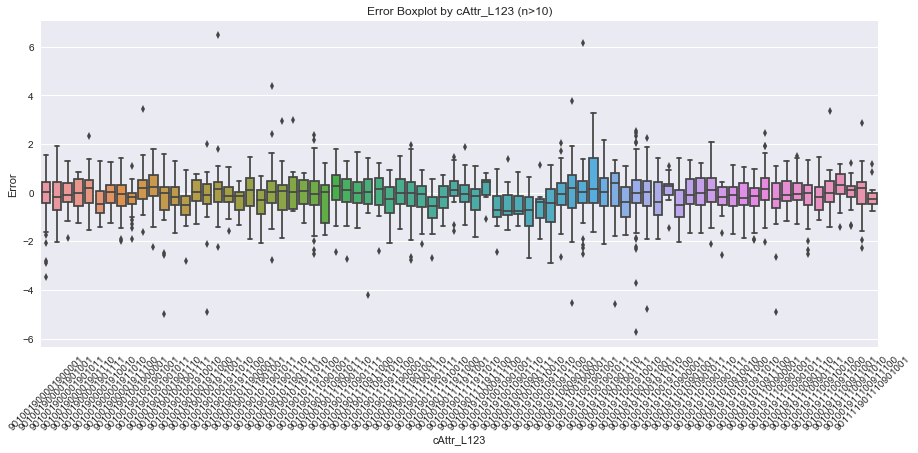

In [76]:
#filtered boxplot for n>10 contributions 
CAL123 = filtcombo3_df.groupby('cAttr_L123').filter(lambda x: x['cAttr_L123'].count()>10)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L123', y = 'Error', data = CAL123)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L123 (n>10)')
plt.show

<function matplotlib.pyplot.show>

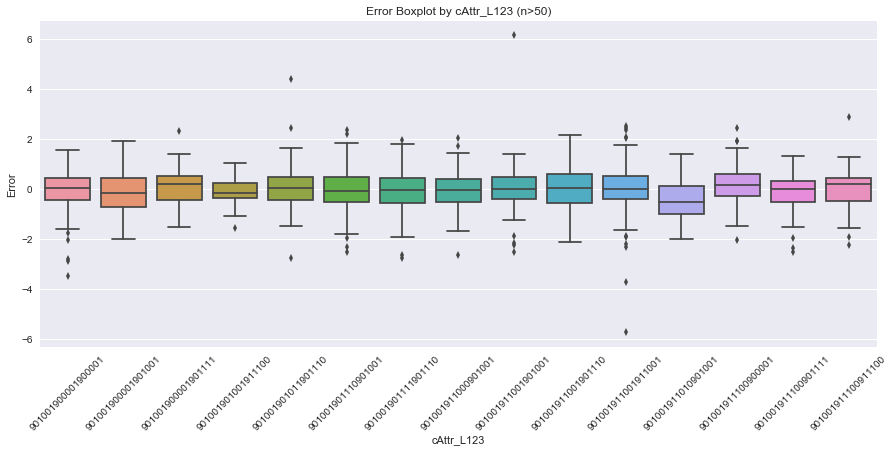

In [77]:
#filtered boxplot for n>50 contributions 
CAL123 = filtcombo3_df.groupby('cAttr_L123').filter(lambda x: x['cAttr_L123'].count()>50)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L123', y = 'Error', data = CAL123)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L123 (n>50)')
plt.show

No 910010, which was strongest single attr combo, shows up in the 3 combos filtered for n>50.  The 910010 does show when only filtered >10 occurences.  This does not alter my conclusion on 910010.  Tukey HSD does show a difference for one combo.

In [78]:
mc = MultiComparison(CAL123['Error'], CAL123['cAttr_L123'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

          Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1             group2       meandiff  lower   upper  reject
---------------------------------------------------------------------
901001900001900001 901001900001901001 -0.0616  -0.5078  0.3846 False 
901001900001900001 901001900001901111  0.1431  -0.3031  0.5893 False 
901001900001900001 901001901001911100 -0.0571  -0.4969  0.3826 False 
901001900001900001 901001901011901110  0.1033  -0.2634  0.4701 False 
901001900001900001 901001901110901001 -0.0134  -0.2838  0.2569 False 
901001900001900001 901001901111901110 -0.0356  -0.3158  0.2445 False 
901001900001900001 901001911000901001 -0.0445  -0.4062  0.3172 False 
901001900001900001 901001911001901001  0.0866  -0.2751  0.4482 False 
901001900001900001 901001911001901110  0.1322  -0.2542  0.5187 False 
901001900001900001 901001911001911001  0.0352  -0.2379  0.3083 False 
901001900001900001 901001911010901001 -0.3848  -0.8101  0.0404 False 
901001900001900001 9

### 901001911010901001 - double KMON around 3504 AD CMPS ~-0.5nm shift 

<function matplotlib.pyplot.show>

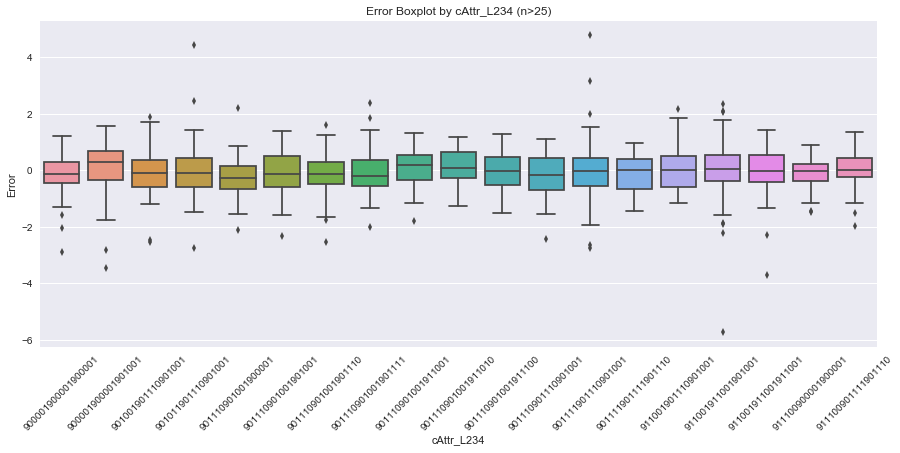

In [79]:
#filtered boxplot for n>25 contributions 
CAL234 = filtcombo3_df.groupby('cAttr_L234').filter(lambda x: x['cAttr_L234'].count()>25)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L234', y = 'Error', data = CAL234)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L234 (n>25)')
plt.show

In [80]:
mc = MultiComparison(CAL234['Error'], CAL234['cAttr_L234'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1             group2       meandiff  lower  upper  reject
--------------------------------------------------------------------
900001900001900001 900001900001901001  0.2288  -0.2601 0.7176 False 
900001900001900001 901001901110901001  0.0179  -0.4737 0.5096 False 
900001900001900001 901011901110901001  0.154    -0.42  0.7281 False 
900001900001900001 901110901001900001 -0.0892  -0.6227 0.4442 False 
900001900001900001 901110901001901001 -0.0046  -0.5618 0.5526 False 
900001900001900001 901110901001901110 -0.0154  -0.5129 0.4821 False 
900001900001900001 901110901001901111  0.1035   -0.414 0.6211 False 
900001900001900001 901110901001911001  0.1886  -0.4195 0.7967 False 
900001900001900001 901110901001911010  0.2562  -0.3519 0.8643 False 
900001900001900001 901110901001911100  0.0467  -0.5336 0.6269 False 
900001900001900001 901110901110901001  -0.106   -0.722  0.51  False 
900001900001900001 901111901110901

### no rejects for L234 attribute combinations

# Convert DF to appropriate column types and attempt implement regression models:

In [91]:
""" 
this should be a clean df of the single lags up to 5.  
May need to recopy fresh df from earlier.
#combined_Attribute_lag1     object
#combined_Attribute_lag2     object
#combined_Attribute_lag3     object
#combined_Attribute_lag4     object
#combined_Attribute_lag5     object
#combined_Feature_lag1       object
#combined_Feature_lag2       object
#combined_Feature_lag3       object
#combined_Feature_lag4       object
#combined_Feature_lag5       object
"""
reg_original_df.head()


,Error,combined_Attribute_lag1,combined_Attribute_lag2,combined_Attribute_lag3,combined_Attribute_lag4,combined_Attribute_lag5,combined_Feature_lag1,combined_Feature_lag2,combined_Feature_lag3,combined_Feature_lag4,combined_Feature_lag5
0,-1.086,911100,911010,910010,901011,901110,25017600200,80012150500,80012150500,80012150500,25070150400
1,0.449,901001,901011,901111,911100,901110,25070150400,80012150500,800301501000,25017600200,25070150400
2,0.471,901001,901001,910000,910010,910010,25070150400,25070150400,60015300800,80012150500,80012150500
3,0.540,901001,901110,901001,901001,910000,25070150400,25070150400,25070150400,25070150400,60015300800
4,-0.438,901001,911010,901110,901001,911100,25070150400,80012150500,25070150400,25070150400,25017600200


In [92]:
# each lagged column is object type that needs to be converted to int and one hot encoded
reg_original_df.dtypes

Error                      float64
combined_Attribute_lag1     object
combined_Attribute_lag2     object
combined_Attribute_lag3     object
combined_Attribute_lag4     object
combined_Attribute_lag5     object
combined_Feature_lag1       object
combined_Feature_lag2       object
combined_Feature_lag3       object
combined_Feature_lag4       object
combined_Feature_lag5       object
dtype: object

In [93]:
#let's get the df objects one hot encoded before splitting testing and training data
data_1hot = pd.get_dummies(reg_original_df)
data_1hot.head()

,Error,combined_Attribute_lag1_900001,combined_Attribute_lag1_901001,combined_Attribute_lag1_901011,combined_Attribute_lag1_901110,combined_Attribute_lag1_901111,combined_Attribute_lag1_910000,combined_Attribute_lag1_910010,combined_Attribute_lag1_910011,combined_Attribute_lag1_911000,...,combined_Feature_lag5_40017600200,combined_Feature_lag5_60008000,combined_Feature_lag5_60015300800,combined_Feature_lag5_60020150500,combined_Feature_lag5_8001080033,combined_Feature_lag5_80012150500,combined_Feature_lag5_800151501000,combined_Feature_lag5_80015600500,combined_Feature_lag5_80020150500,combined_Feature_lag5_800301501000
0,-1.086,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.449,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.471,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.540,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.438,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Time to split the data into train and test

In [94]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data_1hot, 0.2)
print (len(train_set))
print (len(test_set))

3188
797


In [95]:
train_set.head()

,Error,combined_Attribute_lag1_900001,combined_Attribute_lag1_901001,combined_Attribute_lag1_901011,combined_Attribute_lag1_901110,combined_Attribute_lag1_901111,combined_Attribute_lag1_910000,combined_Attribute_lag1_910010,combined_Attribute_lag1_910011,combined_Attribute_lag1_911000,...,combined_Feature_lag5_40017600200,combined_Feature_lag5_60008000,combined_Feature_lag5_60015300800,combined_Feature_lag5_60020150500,combined_Feature_lag5_8001080033,combined_Feature_lag5_80012150500,combined_Feature_lag5_800151501000,combined_Feature_lag5_80015600500,combined_Feature_lag5_80020150500,combined_Feature_lag5_800301501000
3167,0.001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,-0.531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3342,0.543,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1345,0.614,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639,-0.404,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
#create training labels and training data set
training_labels = train_set['Error'].copy()
training_labels.head()

3167    0.001
1722   -0.531
3342    0.543
1345    0.614
1639   -0.404
Name: Error, dtype: float64

In [97]:
training = train_set.drop('Error', axis = 1)
training.head()

,combined_Attribute_lag1_900001,combined_Attribute_lag1_901001,combined_Attribute_lag1_901011,combined_Attribute_lag1_901110,combined_Attribute_lag1_901111,combined_Attribute_lag1_910000,combined_Attribute_lag1_910010,combined_Attribute_lag1_910011,combined_Attribute_lag1_911000,combined_Attribute_lag1_911001,...,combined_Feature_lag5_40017600200,combined_Feature_lag5_60008000,combined_Feature_lag5_60015300800,combined_Feature_lag5_60020150500,combined_Feature_lag5_8001080033,combined_Feature_lag5_80012150500,combined_Feature_lag5_800151501000,combined_Feature_lag5_80015600500,combined_Feature_lag5_80020150500,combined_Feature_lag5_800301501000
3167,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3342,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1345,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
#repeat procedure by splitting test_set into test labels and testing 
testing_labels = test_set['Error'].copy()
testing = test_set.drop('Error', axis = 1)

In [106]:
#import some common tools for regression models

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

def display_scores (scores):
    print ("Scores:", scores)
    print("CVal mean RMSE:", scores.mean())
    print ("CVal stddev:", scores.std())

# Attempt Linear Regression model:

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(training, training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
#checking predictions on a few instances of the training data
some_data = training.iloc[:5]
some_labels = training_labels.iloc[:5]
print ('predictions: \t', lin_reg.predict(some_data))
print ('labels: \t', list(some_labels))

predictions: 	 [-0.09765625  0.01953125 -0.2421875   0.16796875  0.02734375]
labels: 	 [-0.248, 0.57999999999999996, -0.16, 0.10099999999999999, 1.4159999999999999]


In [105]:
#get the rmse of the model

Error_predictions = lin_reg.predict(training)
lin_mse = mse(training_labels, Error_predictions)
lin_rmse = np.sqrt(lin_mse)
print ('linear regression RMSE:', lin_rmse)

linear regression RMSE: 0.869006580432


### Linear Regression produces a RMSE of 0.88 which is roughly equivalent to 1s from the Error column in entire dataset (1s = 0.900) 

In [106]:
### compare k-fold cross validation on lin regression 
lin_scores = cross_val_score(lin_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [  8.57074917e-01   9.41473273e-01   4.80297390e+11   8.02321559e-01
   9.32219490e-01   9.10066160e-01   9.10625782e-01   8.89525761e-01
   8.34287069e-01   1.06588531e+00]
CVal mean RMSE: 48029738993.8
CVal stddev: 144089216979.0


### Linear Regression model is much worse after cross validation.

# Attempt SGD Regressor

In [101]:
from sklearn.linear_model import SGDRegressor
SGD_reg = SGDRegressor()
SGD_reg.fit(training, training_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [102]:
Error_predictions = SGD_reg.predict(training)
SGD_mse = mse(training_labels, Error_predictions)
SGD_rmse = np.sqrt(SGD_mse)
print ('SGD regression RMSE:', SGD_rmse)

SGD regression RMSE: 0.876285494822


In [107]:
scores = cross_val_score(SGD_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
SGD_rmse_scores = np.sqrt(-scores)
display_scores(SGD_rmse_scores)

Scores: [ 0.93740675  0.85751628  0.8625329   0.93456661  0.92899768  0.82106568
  0.75968813  1.05364823  0.89148393  0.83809562]
CVal mean RMSE: 0.888500181002
CVal stddev: 0.0766496422508


In [113]:
#Evaluate on Test Data

SGD_predictions = SGD_reg.predict(testing)
SGD_mse = mse(testing_labels, SGD_predictions)
final_SGD_rmse = np.sqrt(SGD_mse)

print()
print("optimized SGD regression MSE test score:", final_SGD_rmse)


optimized SGD regression MSE test score: 0.923878505485


In [114]:
print("explained_variance_score:", metrics.explained_variance_score(testing_labels, SGD_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, SGD_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, SGD_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, SGD_predictions))

explained_variance_score: 0.0218261614063
mean_absolute_error: 0.657402222653
median_absolute_error: 0.501796940302
R-squared coef of determination: 0.0214960229855


### Test score MSE of 0.92 seems ok at first, but checking further regression metrics of SGD prediction we can see the regression metrics look not so great in that not much of the variance is explained by the model.


# Let's see if Lasso improves the simple linear and SGD models:

In [115]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso()
Lasso_reg.fit(training, training_labels)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
Error_predictions = Lasso_reg.predict(training)
Lasso_mse = mse(training_labels, Error_predictions)
Lasso_rmse = np.sqrt(Lasso_mse)
print ('Lasso regression RMSE:', Lasso_rmse)

Lasso regression RMSE: 0.891926130688


In [117]:
scores = cross_val_score(Lasso_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
Lasso_rmse_scores = np.sqrt(-scores)
display_scores(Lasso_rmse_scores)

Scores: [ 0.94647801  0.86065611  0.85324335  0.92196027  0.93877407  0.83228011
  0.76498157  1.04136176  0.88889723  0.84260821]
CVal mean RMSE: 0.88912407141
CVal stddev: 0.0727415643815


In [118]:
#Evaluate on Test Data

Lasso_predictions = Lasso_reg.predict(testing)
Lasso_mse = mse(testing_labels, Lasso_predictions)
final_Lasso_rmse = np.sqrt(Lasso_mse)

print()
print("optimized Lasso regression MSE test score:", final_Lasso_rmse)


optimized Lasso regression MSE test score: 0.934139652003


In [119]:
print("explained_variance_score:", metrics.explained_variance_score(testing_labels, Lasso_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, Lasso_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, Lasso_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, Lasso_predictions))

explained_variance_score: 0.0
mean_absolute_error: 0.663014672336
median_absolute_error: 0.491602258469
R-squared coef of determination: -0.000360381110204


### Test score MSE of 0.93 isn't really improved, but checking further regression metrics of SGD prediction we can see the regression metrics look not so great in that not much of the variance is explained by the model.


# Let's check final linear model Ridge regression to see if that improves our score:

In [120]:
from sklearn.linear_model import Ridge
Ridge_reg = Ridge()
Ridge_reg.fit(training, training_labels)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
Error_predictions = Ridge_reg.predict(training)
Ridge_mse = mse(training_labels, Error_predictions)
Ridge_rmse = np.sqrt(Ridge_mse)
print ('Ridge regression RMSE:', Ridge_rmse)

Ridge regression RMSE: 0.866711955313


In [122]:
scores = cross_val_score(Ridge_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
Ridge_rmse_scores = np.sqrt(-scores)
display_scores(Ridge_rmse_scores)

Scores: [ 0.93750354  0.86407947  0.85759054  0.94604375  0.93691708  0.84008848
  0.7818426   1.06074084  0.90085853  0.83996014]
CVal mean RMSE: 0.896562496472
CVal stddev: 0.0740633490135


In [123]:
#Evaluate on Test Data

Ridge_predictions = Ridge_reg.predict(testing)
Ridge_mse = mse(testing_labels, Ridge_predictions)
final_Ridge_rmse = np.sqrt(Ridge_mse)

print()
print("optimized Ridge regression MSE test score:", final_Ridge_rmse)
print("explained_variance_score:", metrics.explained_variance_score(testing_labels, Ridge_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, Ridge_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, Ridge_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, Ridge_predictions))


optimized Ridge regression MSE test score: 0.923063156181
explained_variance_score: 0.0234565861745
mean_absolute_error: 0.662259782164
median_absolute_error: 0.506548812625
R-squared coef of determination: 0.023222376572


### Test score Ridge of 0.92 isn't really improved, but checking further regression metrics of SGD prediction we can see the regression metrics look not so great in that not much of the variance is explained by the model but is slightly better than previous models.


# So far the simpler regression models from sklearn linear library are not explaining much of the variance in our data set.  Let's check some ensemble models:

# Attempt RandomForestRegressor model:

In [114]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(training, training_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [115]:
Error_predictions = forest_reg.predict(training)
forest_mse = mse(training_labels, Error_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.58362617372588932

In [116]:
forest_scores = cross_val_score(forest_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 0.96741639  0.98569894  1.10703256  1.08566702  0.98060226  0.93747978
  0.91941732  1.10737542  0.86512     0.99837155]
CVal mean RMSE: 0.995418124702
CVal stddev: 0.0776881244066


### Random Forest w 10 fold cross validation scores RMSE of ~1 before any parameter optimization

### now let's use gridsearch for parameter optimization

In [157]:
#checking feature importance of RandomForest and using gridsearch for best params optimization with 5 fold cross validation
param_grid = [{'n_estimators':[30, 300], 'max_features': [2, 4, 6]},
             {'bootstrap':[True, False], 'n_estimators': [30, 300], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, scoring ="neg_mean_squared_error", cv = 5)
grid_search.fit(training, training_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [30, 300], 'max_features': [2, 4, 6]}, {'bootstrap': [True, False], 'n_estimators': [30, 300], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [158]:
print ('BEST:', grid_search.best_params_)
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

BEST: {'bootstrap': True, 'max_features': 2, 'n_estimators': 300}
0.953168644206 {'max_features': 2, 'n_estimators': 30}
0.948378146647 {'max_features': 2, 'n_estimators': 300}
0.956779475097 {'max_features': 4, 'n_estimators': 30}
0.949418483404 {'max_features': 4, 'n_estimators': 300}
0.957455473157 {'max_features': 6, 'n_estimators': 30}
0.950003138325 {'max_features': 6, 'n_estimators': 300}
0.962003286642 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.945519238071 {'bootstrap': True, 'max_features': 2, 'n_estimators': 300}
0.956120967803 {'bootstrap': True, 'max_features': 3, 'n_estimators': 30}
0.948135502677 {'bootstrap': True, 'max_features': 3, 'n_estimators': 300}
0.959662357803 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
0.946941000298 {'bootstrap': True, 'max_features': 4, 'n_estimators': 300}
0.984745326754 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.977967333869 {'bootstrap': False, 'max_features': 2, 'n_estimators': 300}
0.9

In [159]:
#Evaluate on Test Data
forest_prediction = grid_search.best_estimator_
print("Best estimator:", forest_prediction)

final_forest_predictions = forest_prediction.predict(testing)
final_forest_mse = mse(testing_labels, final_predictions)
final_forest_rmse = np.sqrt(final_forest_mse)

print()
print("optimized random forest regression MSE test score:", final_forest_rmse)

Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

optimized random forest regression MSE test score: 0.871419079448


In [160]:

print("explained_variance_score:", metrics.explained_variance_score(testing_labels, final_forest_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, final_forest_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, final_forest_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, final_forest_predictions))

explained_variance_score: -0.131902481804
mean_absolute_error: 0.704653612506
median_absolute_error: 0.570159521164
R-squared coef of determination: -0.139519625876


### 0.87 MSE score is the best score so far, but checking further regression metrics of best random forest prediction we can see the regression metrics look not so great in that not much of the variance is explained by the model.


In [119]:
feature_importances = grid_search.best_estimator_.feature_importances_
num_attribs = list(training)
sorted(zip(feature_importances, num_attribs), reverse = True)

[(0.024815713780786508, 'combined_Attribute_lag5_901001'),
 (0.02266256285442303, 'combined_Feature_lag5_25070150400'),
 (0.021616922670576941, 'combined_Attribute_lag4_901001'),
 (0.02146772670607925, 'combined_Feature_lag3_25070150400'),
 (0.020898463664212583, 'combined_Attribute_lag2_901001'),
 (0.020840655990711603, 'combined_Feature_lag2_25070150400'),
 (0.020320898328442607, 'combined_Attribute_lag5_901110'),
 (0.019590379162621685, 'combined_Feature_lag4_80012150500'),
 (0.019491841120231338, 'combined_Feature_lag5_80012150500'),
 (0.019255798549966091, 'combined_Attribute_lag3_901001'),
 (0.019134740712479628, 'combined_Attribute_lag2_901110'),
 (0.018767957382063091, 'combined_Feature_lag2_80012150500'),
 (0.018549448509850908, 'combined_Feature_lag4_25070150400'),
 (0.016893582305722157, 'combined_Attribute_lag3_901110'),
 (0.016344169946336827, 'combined_Feature_lag3_80012150500'),
 (0.015536792899334175, 'combined_Attribute_lag5_901011'),
 (0.015275716717167827, 'combined_

### Random Forest improved using larger n_estimators and the min 2 features.  Looking into the feature importances shows that lag1 attributes/features are some of the least important.  This is expected b/c a setup plate run before the Error plate is present on almost all data pts, thus is covers almost the entire data set.  The top 4 importance to predict Error indicate that running 901001/25070150400 as lag 2/5 are most important.  This is followed closely by lag2/5 of 901110.  There are quite a few parameters low down than we can explore dropping.

# Check how well SVM regression models work:

### first we will check linear SVR

In [120]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(training, training_labels)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [121]:
svm_scores = cross_val_score(svm_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [ 0.89568878  0.92731841  1.07673986  1.0149572   0.9548778   0.89758899
  0.82838276  1.05686446  0.78803551  0.97622409]
CVal mean RMSE: 0.941667786199
CVal stddev: 0.088856065489


##### Cross validated mean RMSE is not so great at ~0.95

### second we will check poly kernel SVR

In [122]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(training, training_labels)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
svm_poly_scores = cross_val_score(svm_poly_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
svm_poly_rmse_scores = np.sqrt(-svm_poly_scores)
display_scores(svm_poly_rmse_scores)

Scores: [ 0.86240741  0.89511816  1.03096368  0.98417214  0.91166416  0.85459144
  0.80035824  1.0453618   0.74260228  0.89575406]
CVal mean RMSE: 0.902299337144
CVal stddev: 0.0914708652913


##### poly kernel SVR with 10 fold cross validation improved to ~0.9 mean RMSE

### Both SVM's  linear and nonlinear kernel improve our model.  The nonlinear regression gets us down to ~0.9 out of the box.   Let's attempt to optimize the parameters using a parameter grid in the GridSearchCV.

In [124]:
#grid search optimization of the SVM methods
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
 ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, scoring ="neg_mean_squared_error", cv = 5)
grid_search.fit(training, training_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [125]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}

##### best result from gridsearch above shows high C using poly kernel.

In [126]:
#print all the grid search results
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.912449269578 {'C': 1, 'kernel': 'linear'}
0.913664969392 {'C': 10, 'kernel': 'linear'}
0.913785788986 {'C': 100, 'kernel': 'linear'}
0.913783038024 {'C': 1000, 'kernel': 'linear'}
0.909088560131 {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.909088771709 {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.909086655421 {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.909088769803 {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.909067355493 {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.90908875074 {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.908841240202 {'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}
0.909088560131 {'C': 1000, 'gamma': 0.0001, 'kernel': 'poly'}


In [127]:
#let's now explore a bit more in the poly kernel optimization
#increase C param grid and check gamma around best gama so far.

param_grid = [
  {'C': [1000, 10000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['poly']},
 ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, scoring ="neg_mean_squared_error", cv = 5)
grid_search.fit(training, training_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1000, 10000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [128]:
cvres = grid_search.cv_results_ 
print("BEST: ", grid_search.best_params_)
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

BEST:  {'C': 10000, 'gamma': 0.001, 'kernel': 'poly'}
0.931732889325 {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
0.908841240202 {'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}
0.909088560131 {'C': 1000, 'gamma': 0.0001, 'kernel': 'poly'}
1.04457750642 {'C': 10000, 'gamma': 0.01, 'kernel': 'poly'}
0.907224619254 {'C': 10000, 'gamma': 0.001, 'kernel': 'poly'}
0.909086655421 {'C': 10000, 'gamma': 0.0001, 'kernel': 'poly'}


In [130]:
#let's just check the same best condition using cross val score and 10 folds.  We see results similar to our best result
#from above.
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 10000, epsilon = 0.1, gamma = 0.001)
svm_scores = cross_val_score(svm_poly_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [ 0.88655136  0.89909952  1.03223942  0.98953368  0.92697094  0.86181227
  0.80966083  1.05512694  0.76296423  0.90025515]
CVal mean RMSE: 0.912421433338
CVal stddev: 0.0879388628668


In [147]:
#Let's evaluate the best SVR model and parameters on the test data
svm_prediction = grid_search.best_estimator_
print("Best estimator:", svm_prediction)

final_predictions = svm_prediction.predict(testing)
final_mse = mse(testing_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

print()
print("optimized poly SVM regression MSE test score:", final_rmse)

Best estimator: SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

optimized poly SVM regression MSE test score: 0.871419079448


##### the optimized score comes out to ~0.87 on our test data.  seems pretty good... let's check other metrics....

In [119]:
from sklearn import metrics 

In [149]:
print("explained_variance_score:", metrics.explained_variance_score(testing_labels, final_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, final_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, final_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, final_predictions))

explained_variance_score: 0.0028204956622
mean_absolute_error: 0.651086491464
median_absolute_error: 0.529677822106
R-squared coef of determination: -0.0155238002753


### SVM regression using poly kernel produced a test score of less than 0.88, however we again see poor explanation of variance and poor model R2 value like before.

# Finally we will attempt kNN regression

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
n_neighbors = 2
neigh_reg = KNeighborsRegressor(n_neighbors)
neigh_reg.fit(training, training_labels)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [112]:
neigh_reg_scores = cross_val_score(neigh_reg, training, training_labels, scoring ="neg_mean_squared_error", cv = 10)
neigh_reg_rmse_scores = np.sqrt(-neigh_reg_scores)
display_scores(neigh_reg_rmse_scores)

Scores: [ 1.02470662  1.07699301  1.05637828  0.97672875  1.08292885  1.10435257
  1.08290936  1.01147524  1.04599077  1.24948674]
CVal mean RMSE: 1.07119501823
CVal stddev: 0.0697869453465


### RMSE is ~1 after kNN but using only 2 neighbors which is likely not optimal.  Let's use grid search to explore weights and neighbors optimization

In [113]:
param_grid_knn = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 50, 100]}]

In [116]:
grid_search = GridSearchCV(neigh_reg, param_grid_knn, scoring ="neg_mean_squared_error", cv = 5)
grid_search.fit(training, training_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [117]:
#print out grid search results
cvres = grid_search.cv_results_ 
print("BEST: ", grid_search.best_params_)
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

BEST:  {'n_neighbors': 100, 'weights': 'uniform'}
0.968047595661 {'n_neighbors': 5, 'weights': 'uniform'}
1.01685530059 {'n_neighbors': 5, 'weights': 'distance'}
0.92585469891 {'n_neighbors': 10, 'weights': 'uniform'}
0.987675325666 {'n_neighbors': 10, 'weights': 'distance'}
0.906761837423 {'n_neighbors': 20, 'weights': 'uniform'}
0.973671795047 {'n_neighbors': 20, 'weights': 'distance'}
0.899499122982 {'n_neighbors': 30, 'weights': 'uniform'}
0.970806091921 {'n_neighbors': 30, 'weights': 'distance'}
0.897345213365 {'n_neighbors': 40, 'weights': 'uniform'}
0.970502503543 {'n_neighbors': 40, 'weights': 'distance'}
0.897477199723 {'n_neighbors': 50, 'weights': 'uniform'}
0.970583306399 {'n_neighbors': 50, 'weights': 'distance'}
0.895743625451 {'n_neighbors': 60, 'weights': 'uniform'}
0.969905370171 {'n_neighbors': 60, 'weights': 'distance'}
0.894624252486 {'n_neighbors': 70, 'weights': 'uniform'}
0.969316384442 {'n_neighbors': 70, 'weights': 'distance'}
0.893243016524 {'n_neighbors': 80,

In [118]:
#Let's evaluate the best kNN model and parameters on the test data
kNN_prediction = grid_search.best_estimator_
print("Best estimator:", kNN_prediction)

final_predictions = kNN_prediction.predict(testing)
final_mse = mse(testing_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

print()
print("optimized kNN regression MSE test score:", final_rmse)

Best estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=100, p=2,
          weights='uniform')

optimized kNN regression MSE test score: 0.915226411348


In [120]:
print("explained_variance_score:", metrics.explained_variance_score(testing_labels, final_predictions))
print("mean_absolute_error:", metrics.mean_absolute_error(testing_labels, final_predictions))
print("median_absolute_error:", metrics.median_absolute_error(testing_labels, final_predictions))
print("R-squared coef of determination:", metrics.r2_score(testing_labels, final_predictions))

explained_variance_score: 0.00538248976586
mean_absolute_error: 0.648905420326
median_absolute_error: 0.51297
R-squared coef of determination: 0.00537736184121


### kNN regression using poly kernel produced a test score of ~0.9, however we again see poor explanation of variance and poor model R2 value like before.

# Revisit project goals:
## 1. find any correlations between lagged data and larger |Error| which would be suitable for implementation of run rules in the production line.
## 2. see if any models can predict Error based on previous runs through the tool.

## Key initial assumptions: other noise/error sources are not important (may/may not be true) 

# Basic conclusion bullets for final report:

## 1. We found some very strong outliers in the Error that are suitable to perform DOE to prove run rules are indeed needed

## 2. We see a few of the models get ~0.9 MSE and are scores are reproducable on test, but none of the models are very good at explaining variance in the data.  Conclusion is that the assumption of other noise/errors sources being unimportant is likely false.  Recommendation to further improve the model is to retrieve other sources of data that can me incorporated into the model.  
##          Example: Heat maps of optical emission spectra for the fixed setup run (aka lag1) and each critical plate that measures Error.  